In [3]:
import pandas as pd

try:
    file_name = 'DEGList_EXNum_Compile_PEAK.xlsx' 
    df = pd.read_excel(file_name)

    print(f"Successfully loaded '{file_name}'.")
    print("Here are the first 5 rows of data:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: Could not find the file '{file_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded 'DEGList_EXNum_Compile_PEAK.xlsx'.
Here are the first 5 rows of your data:
           geneID_sgA          geneID_sgB geneName_sgA geneName_sgB  \
0  ENSCCRG00000065139  ENSCCRG00000010307     atp6v1ba     atp6v1ba   
1  ENSCCRG00000056506  ENSCCRG00000035669        soat1        soat1   
2  ENSCCRG00000073057  ENSCCRG00000079082         pgm1         pgm1   
3  ENSCCRG00000026570  ENSCCRG00000010318         st13         st13   
4  ENSCCRG00000061578  ENSCCRG00000033662        cd164        cd164   

   exonCount_sgA  exonCount_sgB          chrom_sgA  \
0             15             15  CAJNDQ010000005.1   
1             16             17  CAJNDQ010000018.1   
2             12             12  CAJNDQ010000017.1   
3             13             13  CAJNDQ010000004.1   
4              6              6  CAJNDQ010000029.1   

                            coords_sgA  gene_length_sgA  \
0    CAJNDQ010000005.1:9112233-9140002            27770   
1    CAJNDQ010000018.1:6816896-6838

In [12]:
print(df.columns.tolist())

['geneID_sgA', 'geneID_sgB', 'geneName_sgA', 'geneName_sgB', 'exonCount_sgA', 'exonCount_sgB', 'chrom_sgA', 'coords_sgA', 'gene_length_sgA', 'target_gene_overlap_sgA', 'No_of_PADREs_10kbFlank_sgA', 'Size_of_PADREs_NearTSS_sgA', 'PADRES_Coords_NearTSS_sgA', 'Strand_Direction_sgA', 'PADRE_exist_sgA', 'distance_PADRE_sgA', 'ATAC-seq Peak_sgA', 'ATAC PEAK_sgA', 'H3K27ac Peak_sgA', 'H3K27ac PEAK_sgA', 'H3K4me3 Peak_sgA', 'H3K4me3 PEAK_sgA', 'H3K27me3 Peak_sgA', 'H3K27me3 PEAK_sgA', 'CAGE Peak_sgA', '%GC_sgA', 'CpG density_sgA', 'TATA Box Density_sgA', 'CAAT Box Density_sgA', 'GC Box Density_sgA', 'E Box Density_sgA', 'CRE Density_sgA', 'chrom_sgB', 'coords_sgB', 'geneID_sgB.1', 'geneName_sgB.1', 'gene_length_sgB', 'target_gene_overlap_sgB', 'No_of_PADREs_10kbFlank_sgB', 'Size_of_PADREs_NearTSS_sgB', 'PADRES_Coords_NearTSS_sgB', 'Strand_Direction_sgB', 'PADRE_exist_sgB', 'distance_PADRE_sgB', 'ATAC-seq Peak_sgB', 'ATAC PEAK_sgB', 'H3K27ac Peak_sgB', 'H3K27ac PEAK_sgB', 'H3K4me3 Peak_sgB', 'H

In [ ]:
plt.savefig('epigenetic_feature_boxplots.png', dpi=300)

In [24]:
import pandas as pd
from scipy.stats import wilcoxon

df = pd.read_excel('DEGList_EXNum_Compile_PEAK.xlsx')


features_to_test = [
    'ATAC PEAK',
    'H3K27ac PEAK',
    'H3K4me3 PEAK',
    'H3K27me3 PEAK'
]

try:
    bias_groups = df['Exp_Bias'].unique()
except KeyError:
    print("Error: The column 'Exp_Bias' was not found in DataFrame.")
    print("Please check that the column name is exactly 'Exp_Bias'.")
    bias_groups = []

print("--- Running Paired Statistical Analysis (Wilcoxon Signed-Rank Test) ---")

for group in bias_groups:
    print(f"\n--- Analyzing Group: '{group}' ---")
    
    df_group = df[df['Exp_Bias'] == group]
    
    for feature in features_to_test:
        col_sgA = f'{feature}_sgA'
        col_sgB = f'{feature}_sgB'
        
        if col_sgA not in df_group.columns or col_sgB not in df_group.columns:
            print(f"  - Skipping feature '{feature}': Columns '{col_sgA}' or '{col_sgB}' not found.")
            continue
        paired_data = df_group[[col_sgA, col_sgB]].dropna()
        data_sgA = paired_data[col_sgA]
        data_sgB = paired_data[col_sgB]
        
        try:
            stat, p_value = wilcoxon(data_sgA, data_sgB)
            
            print(f"  Feature: '{feature}' (sgA vs. sgB)")
            print(f"    - P-value: {p_value:.6f}")
            
            if p_value < 0.05:
                mean_A = data_sgA.mean()
                mean_B = data_sgB.mean()
                direction = "sgA > sgB" if mean_A > mean_B else "sgB > sgA"
                print(f"    - Result: Statistically significant difference ({direction}).")
            else:
                print("    - Result: No statistically significant difference found.")

        except ValueError as e:
            print(f"  Feature: '{feature}' (sgA vs. sgB)")
            print(f"    - Note: Could not perform test. {e}")

--- Running Paired Statistical Analysis (Wilcoxon Signed-Rank Test) ---

--- Analyzing Group: 'Up_Reg' ---
  Feature: 'ATAC PEAK' (sgA vs. sgB)
    - P-value: 0.432011
    - Result: No statistically significant difference found.
  Feature: 'H3K27ac PEAK' (sgA vs. sgB)
    - P-value: 0.048675
    - Result: Statistically significant difference (sgA > sgB).
  Feature: 'H3K4me3 PEAK' (sgA vs. sgB)
    - P-value: 0.091851
    - Result: No statistically significant difference found.
  Feature: 'H3K27me3 PEAK' (sgA vs. sgB)
    - P-value: 0.524913
    - Result: No statistically significant difference found.

--- Analyzing Group: 'No_Change' ---
  Feature: 'ATAC PEAK' (sgA vs. sgB)
    - P-value: 0.148480
    - Result: No statistically significant difference found.
  Feature: 'H3K27ac PEAK' (sgA vs. sgB)
    - P-value: 0.730989
    - Result: No statistically significant difference found.
  Feature: 'H3K4me3 PEAK' (sgA vs. sgB)
    - P-value: 0.957845
    - Result: No statistically significant 

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does 

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

df = pd.read_excel('DEGList_EXNum_MEAN_LSom.xlsx')

features_to_test = [
    'ATAC PEAK_MEAN',
    'H3K27ac PEAK_MEAN',
    'H3K4me3 PEAK_MEAN',
    'H3K27me3 PEAK_MEAN'
]

try:
    bias_groups = df['Exp_Bias'].unique()
except KeyError:
    print("Error: The column 'Exp_Bias' was not found in your DataFrame.")
    bias_groups = []

results_list = []

print("--- Running Analysis to Calculate P-values and Effect Sizes (r-value) ---")

for group in bias_groups:
    df_group = df[df['Exp_Bias'] == group]
    
    for feature in features_to_test:
        col_sgA = f'{feature}_sgA'
        col_sgB = f'{feature}_sgB'
        
        if col_sgA not in df_group.columns or col_sgB not in df_group.columns:
            continue
            
        paired_data = df_group[[col_sgA, col_sgB]].dropna()
        data_sgA = paired_data[col_sgA]
        data_sgB = paired_data[col_sgB]
        
        try:
            
            stat, p_value = wilcoxon(data_sgA, data_sgB)
            
            diff = np.array(data_sgA) - np.array(data_sgB)
            n = len(diff[diff != 0]) 
            
            if n == 0: 
                r_value = 0
            else:

                mu_W = n * (n + 1) / 4
                sigma_W = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
                if sigma_W == 0:
                    z_score = 0
                else:
                    z_score = (stat - mu_W) / sigma_W
                
                r_value = np.abs(z_score) / np.sqrt(n)

            results_list.append({
                'Expression Bias Group': group,
                'Feature': feature,
                'P-value': p_value,
                'r-value (Effect Size)': r_value
            })

        except ValueError:

            results_list.append({
                'Expression Bias Group': group,
                'Feature': feature,
                'P-value': np.nan,
                'r-value (Effect Size)': np.nan
            })

results_df = pd.DataFrame(results_list)

pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.6f}'.format

print("\n--- Summary Table of Statistical Results ---")
print(results_df)

--- Running Analysis to Calculate P-values and Effect Sizes (r-value) ---

--- Summary Table of Statistical Results ---
   Expression Bias Group             Feature  P-value  r-value (Effect Size)
0                 Up_Reg      ATAC PEAK_MEAN 0.441837               0.158751
1                 Up_Reg   H3K27ac PEAK_MEAN 0.009635               0.508541
2                 Up_Reg   H3K4me3 PEAK_MEAN 0.107315               0.325574
3                 Up_Reg  H3K27me3 PEAK_MEAN 0.596500               0.110318
4              No_Change      ATAC PEAK_MEAN 0.607052               0.104978
5              No_Change   H3K27ac PEAK_MEAN 0.095733               0.333646
6              No_Change   H3K4me3 PEAK_MEAN 0.691519               0.080721
7              No_Change  H3K27me3 PEAK_MEAN 0.841465               0.040825
8               Down_Reg      ATAC PEAK_MEAN 0.352520               0.191039
9               Down_Reg   H3K27ac PEAK_MEAN 0.000088               0.723796
10              Down_Reg   H3K4me

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Generating annotated heatmap...


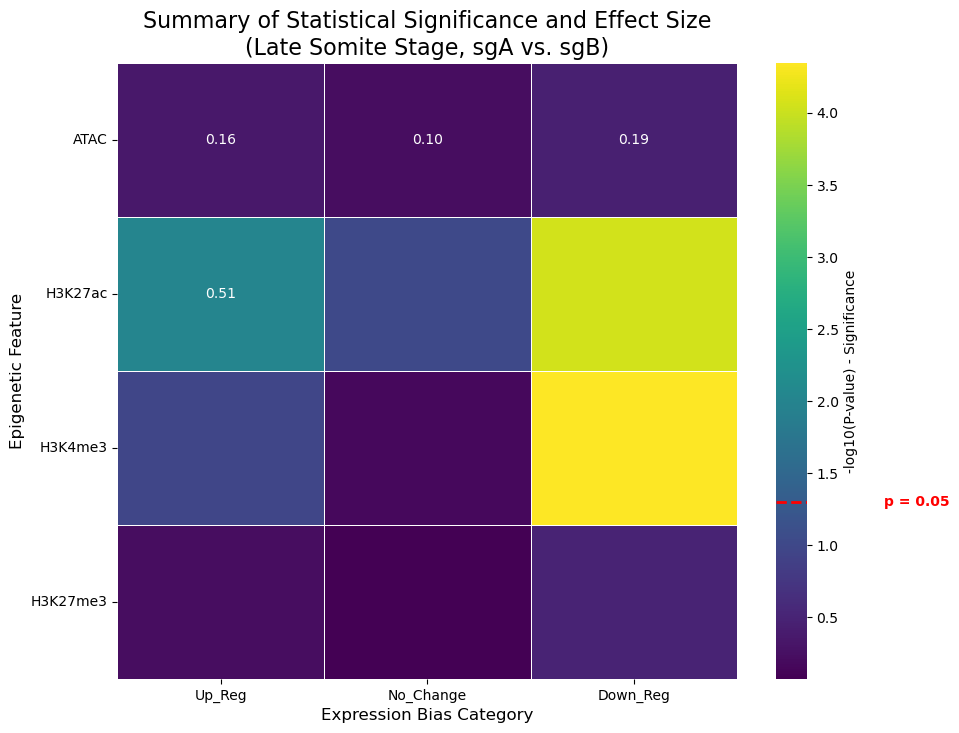

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Expression Bias Group': [
        'Up_Reg', 'Up_Reg', 'Up_Reg', 'Up_Reg',
        'No_Change', 'No_Change', 'No_Change', 'No_Change',
        'Down_Reg', 'Down_Reg', 'Down_Reg', 'Down_Reg'
    ],
    'Feature': [
        'ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN',
        'ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN',
        'ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN'
    ],
    'P-value': [
        0.441837, 0.009635, 0.107315, 0.596500,
        0.607052, 0.095733, 0.691519, 0.841465,
        0.352520, 0.000088, 0.000045, 0.325392
    ],
    'r-value (Effect Size)': [
        0.158751, 0.508541, 0.325574, 0.110318,
        0.104978, 0.333646, 0.080721, 0.040825,
        0.191039, 0.723796, 0.745321, 0.201802
    ]
}
results_df = pd.DataFrame(data)
results_df['Feature'] = results_df['Feature'].str.replace(' PEAK_MEAN', '')

results_df['-log10(P-value)'] = -np.log10(results_df['P-value'])

p_value_heatmap = results_df.pivot(
    index='Feature',
    columns='Expression Bias Group',
    values='-log10(P-value)'
)

r_value_heatmap = results_df.pivot(
    index='Feature',
    columns='Expression Bias Group',
    values='r-value (Effect Size)'
)
col_order = ['Up_Reg', 'No_Change', 'Down_Reg']
row_order = ['ATAC', 'H3K27ac', 'H3K4me3', 'H3K27me3']
p_value_heatmap = p_value_heatmap.reindex(index=row_order, columns=col_order)
r_value_heatmap = r_value_heatmap.reindex(index=row_order, columns=col_order)


print("Generating annotated heatmap...")

plt.figure(figsize=(10, 8))

significance_threshold = -np.log10(0.05)

heatmap = sns.heatmap(
    p_value_heatmap,
    annot=r_value_heatmap, 
    fmt=".2f",             
    cmap='viridis',
    linewidths=.5,         
    linecolor='white',
    cbar_kws={'label': '-log10(P-value) - Significance'} 
)

cbar = heatmap.collections[0].colorbar
cbar.ax.axhline(significance_threshold, color='red', linewidth=2, linestyle='--')
cbar.ax.text(3.5, significance_threshold, 'p = 0.05', color='red', va='center', ha='left', fontweight='bold')


plt.title('Summary of Statistical Significance and Effect Size\n(Late Somite Stage, sgA vs. sgB)', fontsize=16)
plt.xlabel('Expression Bias Category', fontsize=12)
plt.ylabel('Epigenetic Feature', fontsize=12)
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 

plt.savefig('summary_heatmap_late_somite.png', dpi=300, bbox_inches='tight')

plt.show()

Generating fully annotated heatmap...


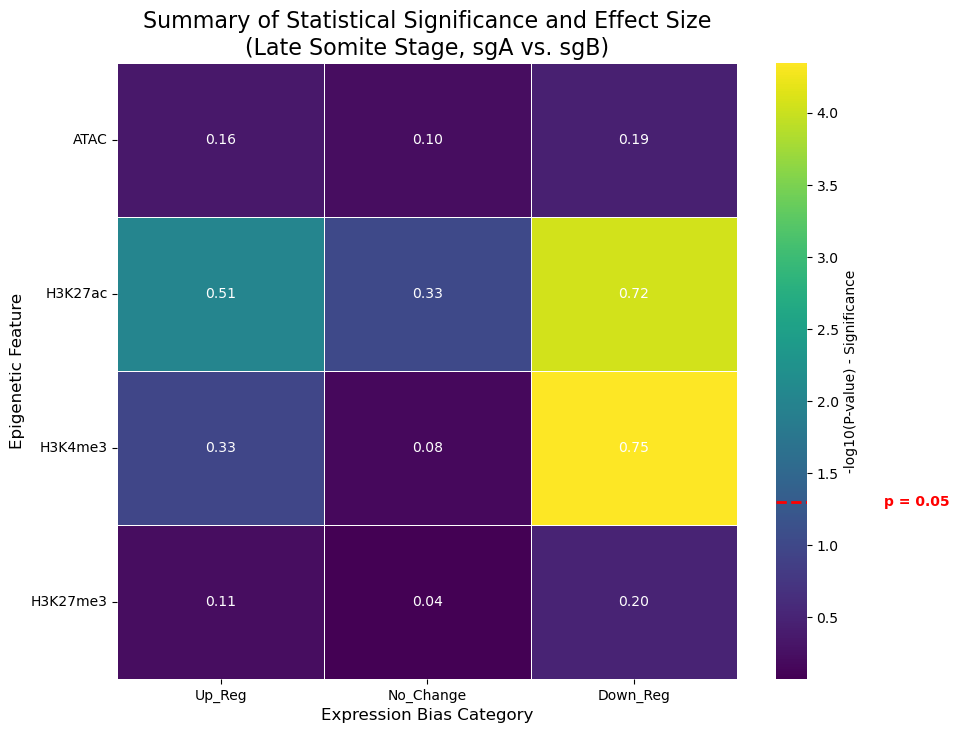

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Expression Bias Group': [
        'Up_Reg', 'Up_Reg', 'Up_Reg', 'Up_Reg',
        'No_Change', 'No_Change', 'No_Change', 'No_Change',
        'Down_Reg', 'Down_Reg', 'Down_Reg', 'Down_Reg'
    ],
    'Feature': [
        'ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN',
        'ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN',
        'ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN'
    ],
    'P-value': [
        0.441837, 0.009635, 0.107315, 0.596500,
        0.607052, 0.095733, 0.691519, 0.841465,
        0.352520, 0.000088, 0.000045, 0.325392
    ],
    'r-value (Effect Size)': [
        0.158751, 0.508541, 0.325574, 0.110318,
        0.104978, 0.333646, 0.080721, 0.040825,
        0.191039, 0.723796, 0.745321, 0.201802
    ]
}
results_df = pd.DataFrame(data)

results_df['Feature'] = results_df['Feature'].str.replace(' PEAK_MEAN', '')


results_df['-log10(P-value)'] = -np.log10(results_df['P-value'])

p_value_heatmap = results_df.pivot(
    index='Feature',
    columns='Expression Bias Group',
    values='-log10(P-value)'
)

r_value_heatmap = results_df.pivot(
    index='Feature',
    columns='Expression Bias Group',
    values='r-value (Effect Size)'
)

col_order = ['Up_Reg', 'No_Change', 'Down_Reg']
row_order = ['ATAC', 'H3K27ac', 'H3K4me3', 'H3K27me3']
p_value_heatmap = p_value_heatmap.reindex(index=row_order, columns=col_order)
r_value_heatmap = r_value_heatmap.reindex(index=row_order, columns=col_order)

print("Generating fully annotated heatmap...")

plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(
    p_value_heatmap,
    annot=False, 
    cmap='viridis',
    linewidths=.5,
    linecolor='white',
    cbar_kws={'label': '-log10(P-value) - Significance'}
)


for i in range(r_value_heatmap.shape[0]):
    for j in range(r_value_heatmap.shape[1]):
        r_value = r_value_heatmap.iloc[i, j]
        plt.text(j + 0.5, i + 0.5, f'{r_value:.2f}',
                 ha='center', va='center', color='white')
cbar = heatmap.collections[0].colorbar
cbar.ax.axhline(-np.log10(0.05), color='red', linewidth=2, linestyle='--')
cbar.ax.text(3.5, -np.log10(0.05), 'p = 0.05', color='red', va='center', ha='left', fontweight='bold')


plt.title('Summary of Statistical Significance and Effect Size\n(Late Somite Stage, sgA vs. sgB)', fontsize=16)
plt.xlabel('Expression Bias Category', fontsize=12)
plt.ylabel('Epigenetic Feature', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.savefig('summary_heatmap_late_somite_fully_annotated.png', dpi=300, bbox_inches='tight')

plt.show()

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

df = pd.read_csv('DEGList_EXNum_MEAN_PHatch.tsv', sep='\t')

features_to_test = [
    'ATAC PEAK_MEAN',
    'H3K27ac PEAK_MEAN',
    'H3K4me3 PEAK_MEAN',
    'H3K27me3 PEAK_MEAN'
]

try:
    bias_groups = df['Exp_Bias'].unique()
except KeyError:
    print("Error: The column 'Exp_Bias' was not found in your DataFrame.")
    bias_groups = []

results_list = []

print("--- Running Analysis to Calculate P-values and Effect Sizes (r-value) ---")

for group in bias_groups:
    df_group = df[df['Exp_Bias'] == group]
    
    for feature in features_to_test:
        col_sgA = f'{feature}_sgA'
        col_sgB = f'{feature}_sgB'
        
        if col_sgA not in df_group.columns or col_sgB not in df_group.columns:
            continue
            
        paired_data = df_group[[col_sgA, col_sgB]].dropna()
        data_sgA = paired_data[col_sgA]
        data_sgB = paired_data[col_sgB]
        
        try:
            stat, p_value = wilcoxon(data_sgA, data_sgB)
            
            diff = np.array(data_sgA) - np.array(data_sgB)
            n = len(diff[diff != 0])
            
            if n == 0:
                r_value = 0
            else:
                mu_W = n * (n + 1) / 4
                sigma_W = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
                if sigma_W == 0:
                    z_score = 0
                else:
                    z_score = (stat - mu_W) / sigma_W
                r_value = np.abs(z_score) / np.sqrt(n)

            results_list.append({
                'Expression Bias Group': group,
                'Feature': feature,
                'P-value': p_value,
                'r-value (Effect Size)': r_value
            })

        except ValueError:
            results_list.append({
                'Expression Bias Group': group,
                'Feature': feature,
                'P-value': np.nan,
                'r-value (Effect Size)': np.nan
            })

results_df = pd.DataFrame(results_list)

pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.6f}'.format

print("\n--- Summary Table of Statistical Results ---")
print(results_df)

--- Running Analysis to Calculate P-values and Effect Sizes (r-value) ---

--- Summary Table of Statistical Results ---
   Expression Bias Group             Feature  P-value  r-value (Effect Size)
0                 Up_Reg      ATAC PEAK_MEAN 0.771159               0.061886
1                 Up_Reg   H3K27ac PEAK_MEAN 0.034174               0.422439
2                 Up_Reg   H3K4me3 PEAK_MEAN 0.095733               0.336336
3                 Up_Reg  H3K27me3 PEAK_MEAN 0.840214               0.046161
4              No_Change      ATAC PEAK_MEAN 0.164496               0.282523
5              No_Change   H3K27ac PEAK_MEAN 0.423711               0.163299
6              No_Change   H3K4me3 PEAK_MEAN 0.542404               0.126462
7              No_Change  H3K27me3 PEAK_MEAN 0.325392               0.201802
8               Down_Reg      ATAC PEAK_MEAN 0.080196               0.352481
9               Down_Reg   H3K27ac PEAK_MEAN 0.025505               0.441273
10              Down_Reg   H3K4me

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Generating comparative heatmaps...


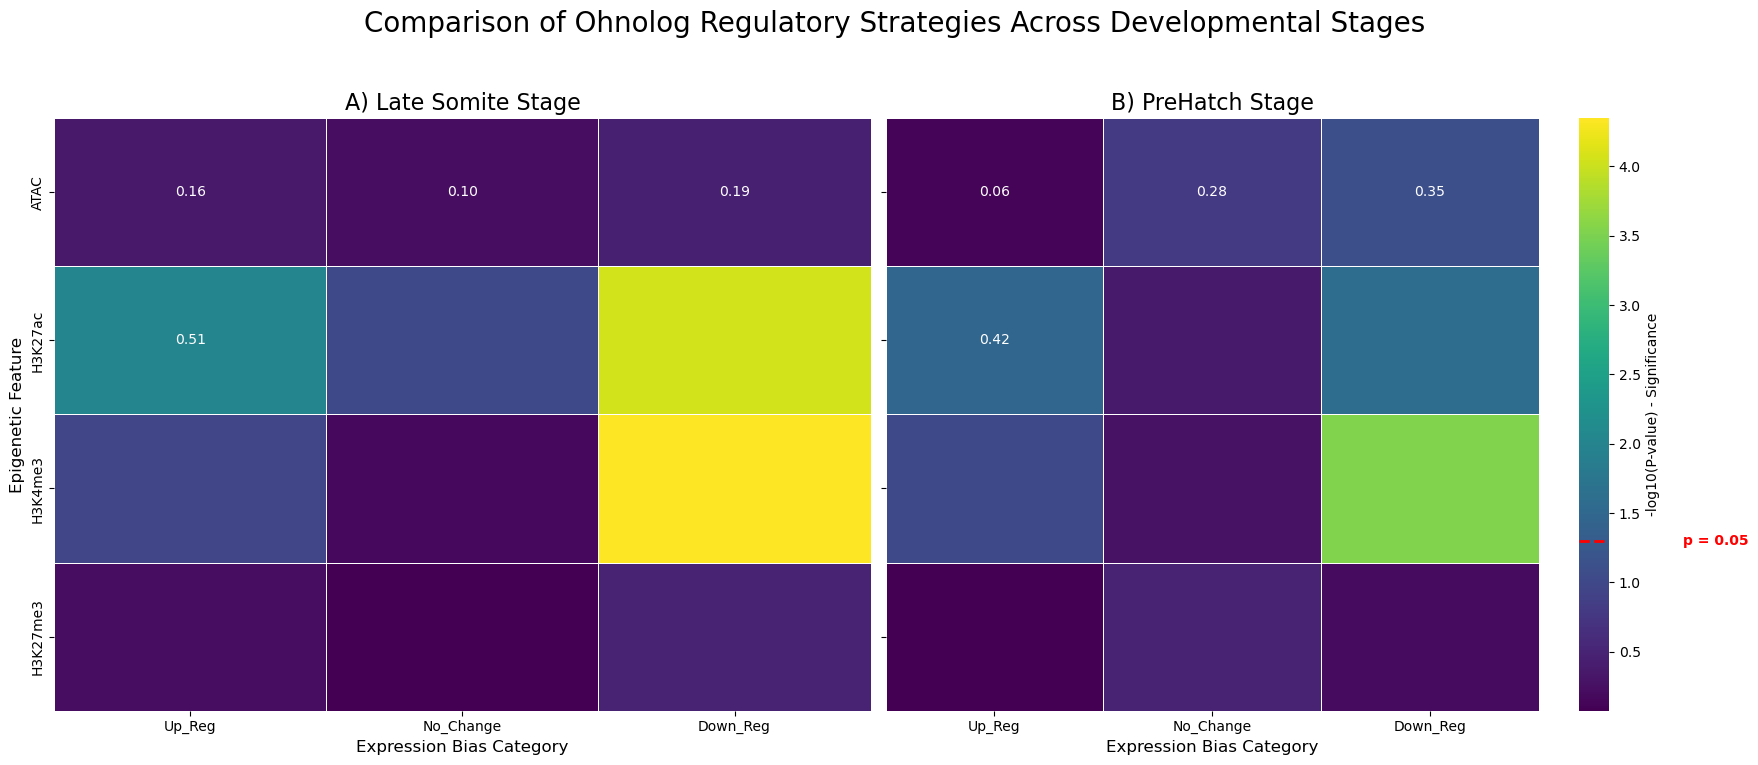

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

late_somite_data = {
    'Expression Bias Group': ['Up_Reg', 'Up_Reg', 'Up_Reg', 'Up_Reg', 'No_Change', 'No_Change', 'No_Change', 'No_Change', 'Down_Reg', 'Down_Reg', 'Down_Reg', 'Down_Reg'],
    'Feature': ['ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN', 'ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN', 'ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN'],
    'P-value': [0.441837, 0.009635, 0.107315, 0.596500, 0.607052, 0.095733, 0.691519, 0.841465, 0.352520, 0.000088, 0.000045, 0.325392],
    'r-value (Effect Size)': [0.158751, 0.508541, 0.325574, 0.110318, 0.104978, 0.333646, 0.080721, 0.040825, 0.191039, 0.723796, 0.745321, 0.201802]
}
df_lsom = pd.DataFrame(late_somite_data)

prehatch_data = {
    'Expression Bias Group': ['Up_Reg', 'Up_Reg', 'Up_Reg', 'Up_Reg', 'No_Change', 'No_Change', 'No_Change', 'No_Change', 'Down_Reg', 'Down_Reg', 'Down_Reg', 'Down_Reg'],
    'Feature': ['ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN', 'ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN', 'ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN'],
    'P-value': [0.771159, 0.034174, 0.095733, 0.840214, 0.164496, 0.423711, 0.542404, 0.325392, 0.080196, 0.025505, 0.000287, 0.633827],
    'r-value (Effect Size)': [0.061886, 0.422439, 0.336336, 0.046161, 0.282523, 0.163299, 0.126462, 0.201802, 0.352481, 0.441273, 0.680745, 0.102246]
}
df_prehatch = pd.DataFrame(prehatch_data)

def prepare_heatmap_data(df, title):
    """Transforms raw results dataframe into pivoted tables for heatmap plotting."""
    df['Feature'] = df['Feature'].str.replace(' PEAK_MEAN', '')
    df['-log10(P-value)'] = -np.log10(df['P-value'])
    
    p_pivot = df.pivot(index='Feature', columns='Expression Bias Group', values='-log10(P-value)')
    r_pivot = df.pivot(index='Feature', columns='Expression Bias Group', values='r-value (Effect Size)')
    
    col_order = ['Up_Reg', 'No_Change', 'Down_Reg']
    row_order = ['ATAC', 'H3K27ac', 'H3K4me3', 'H3K27me3']
    
    p_pivot = p_pivot.reindex(index=row_order, columns=col_order)
    r_pivot = r_pivot.reindex(index=row_order, columns=col_order)
    
    return p_pivot, r_pivot

p_lsom, r_lsom = prepare_heatmap_data(df_lsom, 'Late Somite')
p_prehatch, r_prehatch = prepare_heatmap_data(df_prehatch, 'PreHatch')


print("Generating comparative heatmaps...")

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
fig.suptitle('Comparison of Ohnolog Regulatory Strategies Across Developmental Stages', fontsize=20)

vmin = min(p_lsom.min().min(), p_prehatch.min().min())
vmax = max(p_lsom.max().max(), p_prehatch.max().max())

sns.heatmap(
    p_lsom,
    ax=axes[0],
    annot=r_lsom, 
    fmt=".2f",
    cmap='viridis',
    linewidths=.5,
    linecolor='white',
    cbar=False, 
    vmin=vmin, vmax=vmax 
)
axes[0].set_title('A) Late Somite Stage', fontsize=16)
axes[0].set_xlabel('Expression Bias Category', fontsize=12)
axes[0].set_ylabel('Epigenetic Feature', fontsize=12)


sns.heatmap(
    p_prehatch,
    ax=axes[1],
    annot=r_prehatch, 
    fmt=".2f",
    cmap='viridis',
    linewidths=.5,
    linecolor='white',
    cbar_kws={'label': '-log10(P-value) - Significance'},
    vmin=vmin, vmax=vmax 
)
axes[1].set_title('B) PreHatch Stage', fontsize=16)
axes[1].set_xlabel('Expression Bias Category', fontsize=12)
axes[1].set_ylabel('') 


cbar = axes[1].collections[0].colorbar
cbar.ax.axhline(-np.log10(0.05), color='red', linewidth=2, linestyle='--')
cbar.ax.text(3.5, -np.log10(0.05), 'p = 0.05', color='red', va='center', ha='left', fontweight='bold')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('comparative_regulatory_heatmap.png', dpi=300)

plt.show()


/var/folders/bp/612g8dnd7hv531z_7pdvjlkr0000gn/T/ipykernel_1315/582841776.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p_stars = p_pivot.applymap(lambda p: '***' if p < 0.001 else ('**' if p < 0.01 else ('*' if p < 0.05 else '')))
/var/folders/bp/612g8dnd7hv531z_7pdvjlkr0000gn/T/ipykernel_1315/582841776.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  r_values_text = r_pivot.applymap(lambda r: f'{r:.2f}')
/var/folders/bp/612g8dnd7hv531z_7pdvjlkr0000gn/T/ipykernel_1315/582841776.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p_stars = p_pivot.applymap(lambda p: '***' if p < 0.001 else ('**' if p < 0.01 else ('*' if p < 0.05 else '')))
/var/folders/bp/612g8dnd7hv531z_7pdvjlkr0000gn/T/ipykernel_1315/582841776.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  r_values_text = r_pivot.applymap(lambda r: f'{r:.2f}')
/var/f

Generating new heatmaps with significance asterisks...


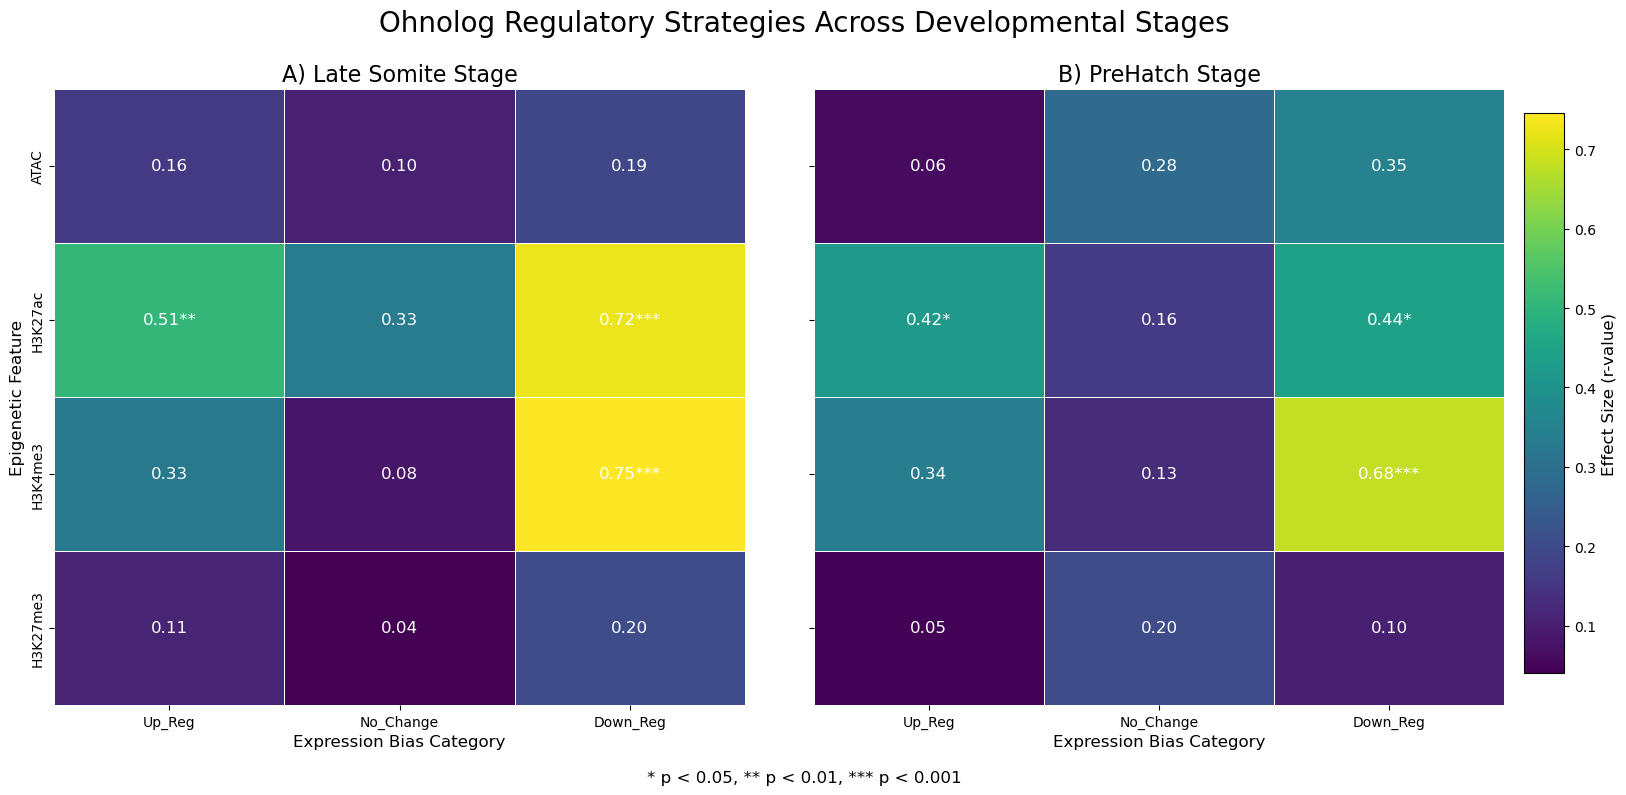

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

late_somite_data = {
    'Expression Bias Group': ['Up_Reg', 'Up_Reg', 'Up_Reg', 'Up_Reg', 'No_Change', 'No_Change', 'No_Change', 'No_Change', 'Down_Reg', 'Down_Reg', 'Down_Reg', 'Down_Reg'],
    'Feature': ['ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN', 'ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN', 'ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN'],
    'P-value': [0.441837, 0.009635, 0.107315, 0.596500, 0.607052, 0.095733, 0.691519, 0.841465, 0.352520, 0.000088, 0.000045, 0.325392],
    'r-value (Effect Size)': [0.158751, 0.508541, 0.325574, 0.110318, 0.104978, 0.333646, 0.080721, 0.040825, 0.191039, 0.723796, 0.745321, 0.201802]
}
df_lsom = pd.DataFrame(late_somite_data)

prehatch_data = {
    'Expression Bias Group': ['Up_Reg', 'Up_Reg', 'Up_Reg', 'Up_Reg', 'No_Change', 'No_Change', 'No_Change', 'No_Change', 'Down_Reg', 'Down_Reg', 'Down_Reg', 'Down_Reg'],
    'Feature': ['ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN', 'ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN', 'ATAC PEAK_MEAN', 'H3K27ac PEAK_MEAN', 'H3K4me3 PEAK_MEAN', 'H3K27me3 PEAK_MEAN'],
    'P-value': [0.771159, 0.034174, 0.095733, 0.840214, 0.164496, 0.423711, 0.542404, 0.325392, 0.080196, 0.025505, 0.000287, 0.633827],
    'r-value (Effect Size)': [0.061886, 0.422439, 0.336336, 0.046161, 0.282523, 0.163299, 0.126462, 0.201802, 0.352481, 0.441273, 0.680745, 0.102246]
}
df_prehatch = pd.DataFrame(prehatch_data)


def prepare_heatmap_data(df):
    df['Feature'] = df['Feature'].str.replace(' PEAK_MEAN', '')
    
    r_pivot = df.pivot(index='Feature', columns='Expression Bias Group', values='r-value (Effect Size)')
    p_pivot = df.pivot(index='Feature', columns='Expression Bias Group', values='P-value')
    
    p_stars = p_pivot.applymap(lambda p: '***' if p < 0.001 else ('**' if p < 0.01 else ('*' if p < 0.05 else '')))
    r_values_text = r_pivot.applymap(lambda r: f'{r:.2f}')
    annot_labels = r_values_text + p_stars

    col_order = ['Up_Reg', 'No_Change', 'Down_Reg']
    row_order = ['ATAC', 'H3K27ac', 'H3K4me3', 'H3K27me3']
    
    r_pivot = r_pivot.reindex(index=row_order, columns=col_order)
    annot_labels = annot_labels.reindex(index=row_order, columns=col_order)
    
    return r_pivot, annot_labels

r_lsom, annot_lsom = prepare_heatmap_data(df_lsom)
r_prehatch, annot_prehatch = prepare_heatmap_data(df_prehatch)


print("Generating new heatmaps with significance asterisks...")

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True, 
                         gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.1})
fig.suptitle('Ohnolog Regulatory Strategies Across Developmental Stages', fontsize=20)

vmin = min(r_lsom.min().min(), r_prehatch.min().min())
vmax = max(r_lsom.max().max(), r_prehatch.max().max())


sns.heatmap(r_lsom, ax=axes[0], annot=False, cmap='viridis', linewidths=.5, linecolor='white', cbar=False, vmin=vmin, vmax=vmax)
axes[0].set_title('A) Late Somite Stage', fontsize=16)
axes[0].set_xlabel('Expression Bias Category', fontsize=12)
axes[0].set_ylabel('Epigenetic Feature', fontsize=12)
for i in range(annot_lsom.shape[0]):
    for j in range(annot_lsom.shape[1]):
        axes[0].text(j + 0.5, i + 0.5, annot_lsom.iloc[i, j], ha='center', va='center', color='white', fontsize=12)


sns.heatmap(r_prehatch, ax=axes[1], annot=False, cmap='viridis', linewidths=.5, linecolor='white', cbar=False, vmin=vmin, vmax=vmax)
axes[1].set_title('B) PreHatch Stage', fontsize=16)
axes[1].set_xlabel('Expression Bias Category', fontsize=12)
axes[1].set_ylabel('')
for i in range(annot_prehatch.shape[0]):
    for j in range(annot_prehatch.shape[1]):
        axes[1].text(j + 0.5, i + 0.5, annot_prehatch.iloc[i, j], ha='center', va='center', color='white', fontsize=12)

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.86, 0.15, 0.02, 0.7])
mappable = axes[0].collections[0]
cbar = fig.colorbar(mappable, cax=cbar_ax)
cbar.set_label('Effect Size (r-value)', size=12)

fig.text(0.5, 0.01, '* p < 0.05, ** p < 0.01, *** p < 0.001', ha='center', va='bottom', fontsize=12)
plt.tight_layout(rect=[0, 0.05, 0.85, 0.95]) 

plt.savefig('comparative_regulatory_heatmap_final_corrected.png', dpi=300)
plt.show()

In [5]:
# Run this to see the exact column names in your DataFrame
print(df.columns.tolist())

['geneID_sgA', 'geneID_sgB', 'geneName_sgA', 'geneName_sgB', 'exonCount_sgA', 'exonCount_sgB', 'chrom_sgA', 'coords_sgA', 'gene_length_sgA', 'target_gene_overlap_sgA', 'No_of_PADREs_10kbFlank_sgA', 'Size_of_PADREs_NearTSS_sgA', 'PADRES_Coords_NearTSS_sgA', 'Strand_Direction_sgA', 'PADRE_exist_sgA', 'distance_PADRE_sgA', 'ATAC-seq Peak_sgA', 'ATAC PEAK_sgA_REP1', 'ATAC PEAK_sgA_REP2', 'ATAC PEAK_MEAN_sgA', 'H3K27ac Peak_sgA', 'H3K27ac PEAK_sgA_REP1', 'H3K27ac PEAK_sgA_REP2', 'H3K27ac PEAK_sgA_REP3', 'H3K27ac PEAK_MEAN_sgA', 'H3K4me3 Peak_sgA', 'H3K4me3 PEAK_sgA_REP1', 'H3K4me3 PEAK_sgA_REP2', 'H3K4me3 PEAK_sgA_REP3', 'H3K4me3 PEAK_MEAN_sgA', 'H3K27me3 Peak_sgA', 'H3K27me3 PEAK_sgA_REP1', 'H3K27me3 PEAK_sgA_REP2', 'H3K27me3 PEAK_sgA_REP3', 'H3K27me3 PEAK_MEAN_sgA', 'CAGE Peak_sgA', '%GC_sgA', 'CpG density_sgA', 'TATA Box Density_sgA', 'CAAT Box Density_sgA', 'GC Box Density_sgA', 'E Box Density_sgA', 'CRE Density_sgA', 'chrom_sgB', 'coords_sgB', 'geneID_sgB.1', 'geneName_sgB.1', 'gene_le

In [7]:
import pandas as pd
import numpy as np

df = pd.read_excel('DEGList_EXNum_MEAN_LSom.xlsx') 

print("Cleaning column names...")
df.columns = df.columns.str.replace(' ', '_').str.replace(r'[\(\)]', '', regex=True)
print("Column names cleaned successfully.")

try:
    up_reg_df = df[df['Exp_Bias'] == 'Up_Reg'].copy()
except KeyError:
    print("Error: Could not find the 'Exp_Bias' column. Please check the exact column name.")

    up_reg_df = pd.DataFrame() 

if not up_reg_df.empty:
    up_reg_df['H3K27ac_diff'] = up_reg_df['H3K27ac_PEAK_MEAN_sgA'] - up_reg_df['H3K27ac_PEAK_MEAN_sgB']

    up_reg_df['H3K4me3_abs_diff'] = np.abs(up_reg_df['H3K4me3_PEAK_MEAN_sgA'] - up_reg_df['H3K4me3_PEAK_MEAN_sgB'])


    enhancer_candidates = up_reg_df[up_reg_df['H3K27ac_diff'] > 0].copy()


    enhancer_candidates_sorted = enhancer_candidates.sort_values(
        by=['H3K4me3_abs_diff', 'H3K27ac_diff'],
        ascending=[True, False]
    )
    print("\n--- Top Candidate Ohnolog Pairs for the 'Enhancer-Driven' Model ---")
    print("Best candidates are at the top of the list.")

    display_cols = [
        'geneName_sgA',
        'geneName_sgB',
        'H3K27ac_diff',
        'H3K4me3_abs_diff',
        'H3K27ac_PEAK_MEAN_sgA',
        'H3K27ac_PEAK_MEAN_sgB',
        'H3K4me3_PEAK_MEAN_sgA',
        'H3K4me3_PEAK_MEAN_sgB'
    ]
    print(enhancer_candidates_sorted[display_cols].head(5))
else:
    print("Could not find any data for the 'Up_Reg' group to analyze.")

Cleaning column names...
Column names cleaned successfully.

--- Top Candidate Ohnolog Pairs for the 'Enhancer-Driven' Model ---
Best candidates are at the top of the list.
   geneName_sgA geneName_sgB  H3K27ac_diff  H3K4me3_abs_diff  \
13       spon2a       spon2a          0.18              0.05   
10      pitpnaa      pitpnaa          0.24              0.09   
11          NaN          NaN          0.03              0.26   
12         mib2         mib2          0.40              0.27   
17         dag1         dag1          0.30              0.30   

    H3K27ac_PEAK_MEAN_sgA  H3K27ac_PEAK_MEAN_sgB  H3K4me3_PEAK_MEAN_sgA  \
13                   0.38                   0.20                   0.22   
10                   0.53                   0.29                   1.05   
11                   0.82                   0.79                   2.96   
12                   0.74                   0.34                   1.89   
17                   1.42                   1.12                   

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('DEGList_EXNum_MEAN_LSom.xlsx') 

print("Cleaning column names...")
df.columns = df.columns.str.replace(' ', '_').str.replace(r'[\(\)]', '', regex=True)
print("Column names cleaned successfully.")

try:
    no_change_df = df[df['Exp_Bias'] == 'No_Change'].copy()
except KeyError:
    print("Error: Could not find the 'Exp_Bias' column. Please check the exact column name.")
    no_change_df = pd.DataFrame()

if not no_change_df.empty:
    no_change_df['ATAC_abs_diff'] = np.abs(no_change_df['ATAC_PEAK_MEAN_sgA'] - no_change_df['ATAC_PEAK_MEAN_sgB'])
    no_change_df['H3K27ac_abs_diff'] = np.abs(no_change_df['H3K27ac_PEAK_MEAN_sgA'] - no_change_df['H3K27ac_PEAK_MEAN_sgB'])
    no_change_df['H3K4me3_abs_diff'] = np.abs(no_change_df['H3K4me3_PEAK_MEAN_sgA'] - no_change_df['H3K4me3_PEAK_MEAN_sgB'])
    no_change_df['H3K27me3_abs_diff'] = np.abs(no_change_df['H3K27me3_PEAK_MEAN_sgA'] - no_change_df['H3K27me3_PEAK_MEAN_sgB'])

    no_change_df['total_difference'] = (
        no_change_df['ATAC_abs_diff'] +
        no_change_df['H3K27ac_abs_diff'] +
        no_change_df['H3K4me3_abs_diff'] +
        no_change_df['H3K27me3_abs_diff']
    )

    symmetrical_candidates_sorted = no_change_df.sort_values(
        by='total_difference',
        ascending=True
    )

    print("\n--- Top Candidate Ohnolog Pairs for the 'Symmetrical Equilibrium' Model ---")
    print("Best candidates (most similar) are at the top of the list.")

    display_cols = [
        'geneName_sgA',
        'geneName_sgB',
        'total_difference',
        'ATAC_PEAK_MEAN_sgA',
        'ATAC_PEAK_MEAN_sgB',
        'H3K27ac_PEAK_MEAN_sgA',
        'H3K27ac_PEAK_MEAN_sgB'
    ]
    print(symmetrical_candidates_sorted[display_cols].head(5))

else:
    print("Could not find any data for the 'No_Change' group to analyze.")

Cleaning column names...
Column names cleaned successfully.

--- Top Candidate Ohnolog Pairs for the 'Symmetrical Equilibrium' Model ---
Best candidates (most similar) are at the top of the list.
   geneName_sgA geneName_sgB  total_difference  ATAC_PEAK_MEAN_sgA  \
46      cyp24a1      cyp24a1              0.04                0.74   
49        dnmt1        dnmt1              0.25                1.02   
45        relch        relch              0.76                1.24   
34          rx1          rx1              0.77                0.59   
43          NaN          NaN              0.80                1.00   

    ATAC_PEAK_MEAN_sgB  H3K27ac_PEAK_MEAN_sgA  H3K27ac_PEAK_MEAN_sgB  
46                0.74                   0.32                   0.34  
49                1.01                   0.90                   1.03  
45                1.48                   0.50                   0.59  
34                0.65                   0.20                   0.43  
43                0.71      

In [3]:
import pandas as pd
import numpy as np

df = pd.read_excel('DEGList_EXNum_MEAN_LSom.xlsx') 


print("Cleaning column names...")
df.columns = df.columns.str.replace(' ', '_').str.replace(r'[\(\)]', '', regex=True)
print("Column names cleaned successfully.")

try:
    down_reg_df = df[df['Exp_Bias'] == 'Down_Reg'].copy()
except KeyError:
    print("Error: Could not find the 'Exp_Bias' column. Please check the exact column name.")
    down_reg_df = pd.DataFrame() 


if not down_reg_df.empty:
    down_reg_df['H3K27ac_diff'] = down_reg_df['H3K27ac_PEAK_MEAN_sgA'] - down_reg_df['H3K27ac_PEAK_MEAN_sgB']
    down_reg_df['H3K4me3_diff'] = down_reg_df['H3K4me3_PEAK_MEAN_sgA'] - down_reg_df['H3K4me3_PEAK_MEAN_sgB']

 
    potentiated_candidates = down_reg_df[(down_reg_df['H3K27ac_diff'] < 0) & (down_reg_df['H3K4me3_diff'] < 0)].copy()

    potentiated_candidates['total_activation_score'] = np.abs(potentiated_candidates['H3K27ac_diff']) + np.abs(potentiated_candidates['H3K4me3_diff'])

    potentiated_candidates_sorted = potentiated_candidates.sort_values(
        by='total_activation_score',
        ascending=False
    )

    print("\n--- Top Candidate Ohnolog Pairs for the 'Potentiated Activation' Model ---")
    print("Best candidates (strongest sgB activation) are at the top of the list.")
    display_cols = [
        'geneName_sgA',
        'geneName_sgB',
        'total_activation_score',
        'H3K27ac_PEAK_MEAN_sgA',
        'H3K27ac_PEAK_MEAN_sgB',
        'H3K4me3_PEAK_MEAN_sgA',
        'H3K4me3_PEAK_MEAN_sgB'
    ]
    print(potentiated_candidates_sorted[display_cols].head(5))

else:
    print("Could not find any data for the 'Down_Reg' group to analyze.")

Cleaning column names...
Column names cleaned successfully.

--- Top Candidate Ohnolog Pairs for the 'Potentiated Activation' Model ---
Best candidates (strongest sgB activation) are at the top of the list.
   geneName_sgA geneName_sgB  total_activation_score  H3K27ac_PEAK_MEAN_sgA  \
58       akap8l       akap8l                    2.84                   0.54   
51          NaN          NaN                    2.83                   1.03   
62        khsrp        khsrp                    2.38                   1.35   
64        tgfb2        tgfb2                    2.36                   0.27   
69         rpa2         rpa2                    2.18                   1.20   

    H3K27ac_PEAK_MEAN_sgB  H3K4me3_PEAK_MEAN_sgA  H3K4me3_PEAK_MEAN_sgB  
58                   1.40                   1.77                   3.75  
51                   2.18                   1.37                   3.05  
62                   2.48                   3.89                   5.14  
64                   1

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

df = pd.read_excel('DEGList_EXNum_MEAN_LSom.xlsx') 

print("Cleaning column names (if necessary)...")
df.columns = df.columns.str.replace(' ', '_').str.replace(r'[\(\)]', '', regex=True)
print("Column names ready.")


feature_to_test = 'No_of_PADREs_10kbFlank'


    bias_groups = df['Exp_Bias'].unique()
except KeyError:
    print("Error: The column 'Exp_Bias' was not found in your DataFrame.")
    bias_groups = []

results_list = []

print("\n--- Running Analysis on Number of PADREs ---")

for group in bias_groups:
    df_group = df[df['Exp_Bias'] == group]
    col_sgA = f'{feature_to_test}_sgA'
    col_sgB = f'{feature_to_test}_sgB'
    
    if col_sgA not in df_group.columns or col_sgB not in df_group.columns:
        print(f"Skipping group '{group}': Columns not found.")
        continue
        
    paired_data = df_group[[col_sgA, col_sgB]].dropna()
    data_sgA = paired_data[col_sgA]
    data_sgB = paired_data[col_sgB]
    
    try:
        stat, p_value = wilcoxon(data_sgA, data_sgB)
        diff = np.array(data_sgA) - np.array(data_sgB)
        n = len(diff[diff != 0])
        
        if n == 0:
            r_value = 0
        else:
            mu_W = n * (n + 1) / 4
            sigma_W = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
            if sigma_W == 0:
                z_score = 0
            else:
                z_score = (stat - mu_W) / sigma_W
            r_value = np.abs(z_score) / np.sqrt(n)

        results_list.append({
            'Expression Bias Group': group,
            'Feature': feature_to_test,
            'P-value': p_value,
            'r-value (Effect Size)': r_value
        })

    except ValueError:
        results_list.append({
            'Expression Bias Group': group,
            'Feature': feature_to_test,
            'P-value': np.nan,
            'r-value (Effect Size)': np.nan
        })

results_df = pd.DataFrame(results_list)

pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.6f}'.format

print("\n--- Summary Table of Statistical Results for PADREs Count ---")
print(results_df)


Cleaning column names (if necessary)...
Column names ready.

--- Running Analysis on Number of PADREs ---

--- Summary Table of Statistical Results for PADREs Count ---
  Expression Bias Group                 Feature  P-value  \
0                Up_Reg  No_of_PADREs_10kbFlank 0.042697   
1             No_Change  No_of_PADREs_10kbFlank 0.138477   
2              Down_Reg  No_of_PADREs_10kbFlank 0.057880   

   r-value (Effect Size)  
0               0.497697  
1               0.333610  
2               0.424681  


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [6]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

try:
    df = pd.read_excel('DEGList_EXNum_MEAN_LSom.xlsx')
    print("Successfully loaded 'DEGList_EXNum_MEAN_LSom.xlsx'.")
except FileNotFoundError:
    print("Error: Could not find the file 'DEGList_EXNum_MEAN_LSom.xlsx'.")
    print("Please make sure the file is in the same directory as your notebook.")
    df = pd.DataFrame() 
if not df.empty:
    print("Cleaning column names...")
    df.columns = df.columns.str.replace(' ', '_').str.replace(r'[\(\)]', '', regex=True)
    print("Column names ready for analysis.")
features_to_test = [
    '%GC',
    'CpG_density',
    'TATA_Box_Density',
    'CAAT_Box_Density',
    'GC_Box_Density',
    'E_Box_Density',
    'CRE_Density'
]
try:
    bias_groups = df['Exp_Bias'].unique()
except KeyError:
    print("Error: The column 'Exp_Bias' was not found in your DataFrame.")
    bias_groups = []

results_list = []

print("\n--- Running Analysis on Promoter Motif Densities ---")

for group in bias_groups:
    df_group = df[df['Exp_Bias'] == group]
    
    for feature in features_to_test:
        col_sgA = f'{feature}_sgA'
        col_sgB = f'{feature}_sgB'
        
        if col_sgA not in df_group.columns or col_sgB not in df_group.columns:
            print(f"Skipping feature '{feature}': Columns '{col_sgA}' or '{col_sgB}' not found.")
            continue
            
        paired_data = df_group[[col_sgA, col_sgB]].dropna()
        data_sgA = paired_data[col_sgA]
        data_sgB = paired_data[col_sgB]
        
        try:
            stat, p_value = wilcoxon(data_sgA, data_sgB)
            
            diff = np.array(data_sgA) - np.array(data_sgB)
            n = len(diff[diff != 0])
            
            if n == 0:
                r_value = 0
            else:
                mu_W = n * (n + 1) / 4
                sigma_W = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
                if sigma_W == 0:
                    z_score = 0
                else:
                    z_score = (stat - mu_W) / sigma_W
                r_value = np.abs(z_score) / np.sqrt(n)

            results_list.append({
                'Expression Bias Group': group,
                'Feature': feature,
                'P-value': p_value,
                'r-value (Effect Size)': r_value
            })

        except ValueError:
            results_list.append({
                'Expression Bias Group': group,
                'Feature': feature,
                'P-value': np.nan,
                'r-value (Effect Size)': np.nan
            })
if results_list:
    results_df = pd.DataFrame(results_list)

    pd.set_option('display.max_rows', None)
    pd.options.display.float_format = '{:.6f}'.format

    print("\n--- Summary Table of Statistical Results for Promoter Architecture ---")
    print(results_df)
else:
    print("\nNo results to display. Please check column names and data.")


Successfully loaded 'DEGList_EXNum_MEAN_LSom.xlsx'.
Cleaning column names...
Column names ready for analysis.

--- Running Analysis on Promoter Motif Densities ---

--- Summary Table of Statistical Results for Promoter Architecture ---
   Expression Bias Group           Feature  P-value  r-value (Effect Size)
0                 Up_Reg               %GC 0.170220               0.279942
1                 Up_Reg       CpG_density 0.753304               0.064153
2                 Up_Reg  TATA_Box_Density 0.865534               0.063888
3                 Up_Reg  CAAT_Box_Density 0.504575               0.192487
4                 Up_Reg    GC_Box_Density 0.179712               0.948683
5                 Up_Reg     E_Box_Density 0.144289               0.304414
6                 Up_Reg       CRE_Density 0.654721               0.316228
7              No_Change               %GC 0.791476               0.056505
8              No_Change       CpG_density 0.113491               0.317502
9             

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/opt/anaconda3/lib/python3.1

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

try:
    df = pd.read_excel('DEGList_EXNum_MEAN_LSom.xlsx')
    print("Successfully loaded 'DEGList_EXNum_MEAN_LSom.xlsx'.")
except FileNotFoundError:
    print("Error: Could not find the file 'DEGList_EXNum_MEAN_LSom.xlsx'.")
    df = pd.DataFrame()

if not df.empty:
    print("Cleaning column names...")
    df.columns = df.columns.str.replace(' ', '_').str.replace(r'[\(\)]', '', regex=True)
    print("Column names ready for analysis.")

features_to_test = [
    '%GC',
    'CpG_density',
    'TATA_Box_Density',
    'CAAT_Box_Density',
    'GC_Box_Density',
    'E_Box_Density',
    'CRE_Density'
]

try:
    bias_groups = df['Exp_Bias'].unique()
except KeyError:
    print("Error: The column 'Exp_Bias' was not found in your DataFrame.")
    bias_groups = []
results_list = []
print("\n--- Running Analysis on Promoter Motif Densities ---")

for group in bias_groups:
    df_group = df[df['Exp_Bias'] == group]
    
    for feature in features_to_test:
        col_sgA = f'{feature}_sgA'
        col_sgB = f'{feature}_sgB'
        
        if col_sgA not in df_group.columns or col_sgB not in df_group.columns:
            continue
            
        paired_data = df_group[[col_sgA, col_sgB]].dropna()
        data_sgA = paired_data[col_sgA]
        data_sgB = paired_data[col_sgB]
        
        try:
            stat, p_value = wilcoxon(data_sgA, data_sgB)
            
            diff = np.array(data_sgA) - np.array(data_sgB)
            n = len(diff[diff != 0])
            
            if n > 0:
                z_score = (stat - (n * (n + 1) / 4)) / np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
                r_value = np.abs(z_score) / np.sqrt(n)
            else:
                r_value = 0

            results_list.append({
                'Expression Bias Group': group,
                'Feature': feature,
                'P-value': p_value,
                'r-value (Effect Size)': r_value
            })

        except ValueError:
            results_list.append({
                'Expression Bias Group': group,
                'Feature': feature,
                'P-value': np.nan,
                'r-value (Effect Size)': np.nan
            })

if results_list:
    results_df = pd.DataFrame(results_list)
    results_df.dropna(subset=['P-value'], inplace=True)
    
    reject, q_values, sidak, bonferroni = multipletests(results_df['P-value'], alpha=0.05, method='fdr_bh')
    results_df['q-value (Adjusted P)'] = q_values

    pd.set_option('display.max_rows', None)
    pd.options.display.float_format = '{:.6f}'.format

    print("\n--- Summary Table of Promoter Architecture Results with FDR Correction ---")
    print(results_df)
else:
    print("\nNo results to display. Please check column names and data.")


Successfully loaded 'DEGList_EXNum_MEAN_LSom.xlsx'.
Cleaning column names...
Column names ready for analysis.

--- Running Analysis on Promoter Motif Densities ---

--- Summary Table of Promoter Architecture Results with FDR Correction ---
   Expression Bias Group           Feature  P-value  r-value (Effect Size)  \
0                 Up_Reg               %GC 0.170220               0.279942   
1                 Up_Reg       CpG_density 0.753304               0.064153   
2                 Up_Reg  TATA_Box_Density 0.865534               0.063888   
3                 Up_Reg  CAAT_Box_Density 0.504575               0.192487   
4                 Up_Reg    GC_Box_Density 0.179712               0.948683   
5                 Up_Reg     E_Box_Density 0.144289               0.304414   
6                 Up_Reg       CRE_Density 0.654721               0.316228   
7              No_Change               %GC 0.791476               0.056505   
8              No_Change       CpG_density 0.113491       

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/opt/anaconda3/lib/python3.1

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests


try:
    df = pd.read_excel('DEGList_EXNum_MEAN_LSom.xlsx')
    print("Successfully loaded 'DEGList_EXNum_MEAN_LSom.xlsx'.")
except FileNotFoundError:
    print("Error: Could not find the file 'DEGList_EXNum_MEAN_LSom.xlsx'.")
    df = pd.DataFrame() 

if not df.empty:
    print("Cleaning column names...")
    df.columns = df.columns.str.replace(' ', '_').str.replace(r'[\(\)]', '', regex=True)
    print("Column names ready for analysis.")

feature_to_test = 'No_of_PADREs_10kbFlank'

try:
    bias_groups = df['Exp_Bias'].unique()
except KeyError:
    print("Error: The column 'Exp_Bias' was not found in your DataFrame.")
    bias_groups = []

results_list = []
print("\n--- Running Analysis on Number of PADREs ---")

for group in bias_groups:
    df_group = df[df['Exp_Bias'] == group]
    
    col_sgA = f'{feature_to_test}_sgA'
    col_sgB = f'{feature_to_test}_sgB'
    
    if col_sgA not in df_group.columns or col_sgB not in df_group.columns:
        continue
        
    paired_data = df_group[[col_sgA, col_sgB]].dropna()
    data_sgA = paired_data[col_sgA]
    data_sgB = paired_data[col_sgB]
    
    try:
        stat, p_value = wilcoxon(data_sgA, data_sgB)
        
        diff = np.array(data_sgA) - np.array(data_sgB)
        n = len(diff[diff != 0])
        
        if n > 0:
            z_score = (stat - (n * (n + 1) / 4)) / np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
            r_value = np.abs(z_score) / np.sqrt(n)
        else:
            r_value = 0

        results_list.append({
            'Expression Bias Group': group,
            'Feature': feature_to_test,
            'P-value': p_value,
            'r-value (Effect Size)': r_value
        })

    except ValueError:
        results_list.append({
            'Expression Bias Group': group,
            'Feature': feature_to_test,
            'P-value': np.nan,
            'r-value (Effect Size)': np.nan
        })
if results_list:
    results_df = pd.DataFrame(results_list)
    results_df.dropna(subset=['P-value'], inplace=True)
    reject, q_values, sidak, bonferroni = multipletests(results_df['P-value'], alpha=0.05, method='fdr_bh')
    results_df['q-value (Adjusted P)'] = q_values

    pd.set_option('display.max_rows', None)
    pd.options.display.float_format = '{:.6f}'.format

    print("\n--- Summary Table of PADREs Count Results with FDR Correction ---")
    print(results_df)
else:
    print("\nNo results to display. Please check column names and data.")


Successfully loaded 'DEGList_EXNum_MEAN_LSom.xlsx'.
Cleaning column names...
Column names ready for analysis.

--- Running Analysis on Number of PADREs ---

--- Summary Table of PADREs Count Results with FDR Correction ---
  Expression Bias Group                 Feature  P-value  \
0                Up_Reg  No_of_PADREs_10kbFlank 0.042697   
1             No_Change  No_of_PADREs_10kbFlank 0.138477   
2              Down_Reg  No_of_PADREs_10kbFlank 0.057880   

   r-value (Effect Size)  q-value (Adjusted P)  
0               0.497697              0.086820  
1               0.333610              0.138477  
2               0.424681              0.086820  


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [15]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

try:
    df = pd.read_excel('DEGList_EXNum_MEAN_LSom.xlsx')
    print("Successfully loaded 'DEGList_EXNum_MEAN_LSom.xlsx'.")
except FileNotFoundError:
    print("Error: Could not find the file 'DEGList_EXNum_MEAN_LSom.xlsx'.")
    df = pd.DataFrame()


if not df.empty:
    print("Cleaning column names...")
    df.columns = df.columns.str.replace(' ', '_').str.replace(r'[\(\)]', '', regex=True)
    print("Column names ready for analysis.")

if not df.empty:
    df.loc[:, 'expression_sgB'] = (2 * df['baseMean']) / (np.power(2, df['log2FoldChange_S11_Lsom']) + 1)
    df.loc[:, 'expression_sgA'] = (2 * df['baseMean']) - df['expression_sgB']

if not df.empty:
    up_reg_df = df[df['Exp_Bias'] == 'Up_Reg']
    down_reg_df = df[df['Exp_Bias'] == 'Down_Reg']

    dominant_A = up_reg_df[['expression_sgA', 'H3K27ac_PEAK_MEAN_sgA']].rename(columns={'expression_sgA': 'expression', 'H3K27ac_PEAK_MEAN_sgA': 'h3k27ac'})
    dominant_B = down_reg_df[['expression_sgB', 'H3K27ac_PEAK_MEAN_sgB']].rename(columns={'expression_sgB': 'expression', 'H3K27ac_PEAK_MEAN_sgB': 'h3k27ac'})
    dominant_df = pd.concat([dominant_A, dominant_B])
    suppressed_A = down_reg_df[['expression_sgA', 'H3K27ac_PEAK_MEAN_sgA']].rename(columns={'expression_sgA': 'expression', 'H3K27ac_PEAK_MEAN_sgA': 'h3k27ac'})
    suppressed_B = up_reg_df[['expression_sgB', 'H3K27ac_PEAK_MEAN_sgB']].rename(columns={'expression_sgB': 'expression', 'H3K27ac_PEAK_MEAN_sgB': 'h3k27ac'})
    suppressed_df = pd.concat([suppressed_A, suppressed_B])

    print("\n--- Correlation Analysis: H3K27ac vs. Expression ---")
    corr_dom, p_dom = spearmanr(dominant_df['h3k27ac'], dominant_df['expression'])
    print("\nAnalysis for DOMINANT Ohnologs (n=50):")
    print(f"  - Spearman Correlation Coefficient (rho): {corr_dom:.4f}")
    print(f"  - P-value: {p_dom:.6f}")
    if p_dom < 0.05:
        print("  - Result: A statistically significant correlation was found.")
    else:
        print("  - Result: No statistically significant correlation was found.")
    corr_supp, p_supp = spearmanr(suppressed_df['h3k27ac'], suppressed_df['expression'])
    print("\nAnalysis for SUPPRESSED Ohnologs (n=50):")
    print(f"  - Spearman Correlation Coefficient (rho): {corr_supp:.4f}")
    print(f"  - P-value: {p_supp:.6f}")
    if p_supp < 0.05:
        print("  - Result: A statistically significant correlation was found.")
    else:
        print("  - Result: No statistically significant correlation was found.")

else:
    print("\nAnalysis could not be completed due to missing data file.")



Successfully loaded 'DEGList_EXNum_MEAN_LSom.xlsx'.
Cleaning column names...
Column names ready for analysis.

--- Correlation Analysis: H3K27ac vs. Expression ---

Analysis for DOMINANT Ohnologs (n=50):
  - Spearman Correlation Coefficient (rho): 0.3502
  - P-value: 0.012665
  - Result: A statistically significant correlation was found.

Analysis for SUPPRESSED Ohnologs (n=50):
  - Spearman Correlation Coefficient (rho): 0.2694
  - P-value: 0.058471
  - Result: No statistically significant correlation was found.


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

try:
    df = pd.read_excel('DEGList_EXNum_MEAN_LSom.xlsx')
    print("Successfully loaded 'DEGList_EXNum_MEAN_LSom.xlsx'.")
except FileNotFoundError:
    print("Error: Could not find the file 'DEGList_EXNum_MEAN_LSom.xlsx'.")
    df = pd.DataFrame()

if not df.empty:
    print("Cleaning column names...")
    df.columns = df.columns.str.replace(' ', '_').str.replace(r'[\(\)]', '', regex=True)
    print("Column names ready for analysis.")
feature_to_test = 'distance_PADRE'

try:
    bias_groups = df['Exp_Bias'].unique()
except KeyError:
    print("Error: The column 'Exp_Bias' was not found in your DataFrame.")
    bias_groups = []

results_list = []
print("\n--- Running Analysis on PADREs Distance to TSS ---")

for group in bias_groups:
    df_group = df[df['Exp_Bias'] == group]
    
    col_sgA = f'{feature_to_test}_sgA'
    col_sgB = f'{feature_to_test}_sgB'
    
    if col_sgA not in df_group.columns or col_sgB not in df_group.columns:
        print(f"Skipping group '{group}': Columns not found.")
        continue
        
    paired_data = df_group[[col_sgA, col_sgB]].dropna()
    data_sgA = paired_data[col_sgA]
    data_sgB = paired_data[col_sgB]
    
    try:
        stat, p_value = wilcoxon(data_sgA, data_sgB)
        
        diff = np.array(data_sgA) - np.array(data_sgB)
        n = len(diff[diff != 0])
        
        if n > 0:
            z_score = (stat - (n * (n + 1) / 4)) / np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
            r_value = np.abs(z_score) / np.sqrt(n)
        else:
            r_value = 0
        results_list.append({
            'Expression Bias Group': group,
            'Feature': feature_to_test,
            'P-value': p_value,
            'r-value (Effect Size)': r_value
        })

    except ValueError:
        results_list.append({
            'Expression Bias Group': group,
            'Feature': feature_to_test,
            'P-value': np.nan,
            'r-value (Effect Size)': np.nan
        })
if results_list:
    results_df = pd.DataFrame(results_list)

    pd.set_option('display.max_rows', None)
    pd.options.display.float_format = '{:.6f}'.format

    print("\n--- Summary Table of Statistical Results for PADREs Distance ---")
    print(results_df)
else:
    print("\nNo results to display. Please check column names and data.")


Successfully loaded 'DEGList_EXNum_MEAN_LSom.xlsx'.
Cleaning column names...
Column names ready for analysis.

--- Running Analysis on PADREs Distance to TSS ---

--- Summary Table of Statistical Results for PADREs Distance ---
  Expression Bias Group         Feature  P-value  r-value (Effect Size)
0                Up_Reg  distance_PADRE 0.145077               0.297438
1             No_Change  distance_PADRE 0.252104               0.234090
2              Down_Reg  distance_PADRE 0.474165               0.147988


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [1]:
import pandas as pd
from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations
try:
    df = pd.read_excel('DEGList_EXNum_MEAN_LSom.xlsx')
    print("Successfully loaded 'DEGList_EXNum_MEAN_LSom.xlsx'.")
except FileNotFoundError:
    print("Error: Could not find the file 'DEGList_EXNum_MEAN_LSom.xlsx'.")
    df = pd.DataFrame()
if not df.empty:
    print("Cleaning column names...")
    df.rename(columns={'nt%_Alignmnent': 'nt_percent_alignment'}, inplace=True)
    df.columns = df.columns.str.replace(' ', '_').str.replace(r'[\(\)]', '', regex=True)
    print("Column names ready for analysis.")
if not df.empty:
    try:
        group_data = {
            group: df[df['Exp_Bias'] == group]['nt_percent_alignment'].dropna().tolist()
            for group in df['Exp_Bias'].unique()
        }
        up_reg_data = group_data.get('Up_Reg', [])
        no_change_data = group_data.get('No_Change', [])
        down_reg_data = group_data.get('Down_Reg', [])
        print("\n--- Kruskal-Wallis H-test (Comparing all 3 groups) ---")
        stat_kw, p_kw = kruskal(up_reg_data, no_change_data, down_reg_data)
        
        print(f"  - Kruskal-Wallis H-statistic: {stat_kw:.4f}")
        print(f"  - P-value: {p_kw:.6f}")
        
        if p_kw < 0.05:
            print("  - Result: A statistically significant difference exists among the groups.")
            print("\n--- Pairwise Mann-Whitney U tests (Post-hoc Analysis) ---")
            
            groups_to_compare = {
                'Up_Reg': up_reg_data,
                'No_Change': no_change_data,
                'Down_Reg': down_reg_data
            }
            for (group1_name, group1_data), (group2_name, group2_data) in combinations(groups_to_compare.items(), 2):
                if group1_data and group2_data:
                    stat_mw, p_mw = mannwhitneyu(group1_data, group2_data, alternative='two-sided')
                    print(f"\n  Comparison: '{group1_name}' vs '{group2_name}'")
                    print(f"    - P-value: {p_mw:.6f}")
                    if p_mw < 0.05:
                        print("    - Result: Statistically significant difference.")
                    else:
                        print("    - Result: No statistically significant difference.")
        else:
            print("  - Result: No statistically significant difference exists among the groups. No post-hoc tests needed.")

    except KeyError:
        print("\nError: Could not find 'Exp_Bias' or 'nt_percent_alignment' columns. Please check names.")
else:
    print("\nAnalysis could not be completed due to missing data file.")



Successfully loaded 'DEGList_EXNum_MEAN_LSom.xlsx'.
Cleaning column names...
Column names ready for analysis.

--- Kruskal-Wallis H-test (Comparing all 3 groups) ---
  - Kruskal-Wallis H-statistic: 0.6577
  - P-value: 0.719762
  - Result: No statistically significant difference exists among the groups. No post-hoc tests needed.


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

try:
    df = pd.read_excel('DEGList_EXNum_MEAN_LSom.xlsx')
    print("Successfully loaded 'DEGList_EXNum_MEAN_LSom.xlsx'.")
except FileNotFoundError:
    print("Error: Could not find the file 'DEGList_EXNum_MEAN_LSom.xlsx'.")
    df = pd.DataFrame()
if not df.empty:
    print("Cleaning column names...")
    df.columns = df.columns.str.replace(' ', '_').str.replace(r'[\(\)]', '', regex=True)
    print("Column names ready for analysis.")
feature_to_test = 'exonCount'

try:
    bias_groups = df['Exp_Bias'].unique()
except KeyError:
    print("Error: The column 'Exp_Bias' was not found in your DataFrame.")
    bias_groups = []
results_list = []

print("\n--- Running Analysis on Exon Count ---")

for group in bias_groups:
    df_group = df[df['Exp_Bias'] == group]
    
    col_sgA = f'{feature_to_test}_sgA'
    col_sgB = f'{feature_to_test}_sgB'
    
    if col_sgA not in df_group.columns or col_sgB not in df_group.columns:
        print(f"Skipping group '{group}': Columns not found.")
        continue
        
    paired_data = df_group[[col_sgA, col_sgB]].dropna()
    data_sgA = paired_data[col_sgA]
    data_sgB = paired_data[col_sgB]
    
    try:
        stat, p_value = wilcoxon(data_sgA, data_sgB)
        diff = np.array(data_sgA) - np.array(data_sgB)
        n = len(diff[diff != 0])
        
        if n > 0:
            z_score = (stat - (n * (n + 1) / 4)) / np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
            r_value = np.abs(z_score) / np.sqrt(n)
        else:
            r_value = 0
        results_list.append({
            'Expression Bias Group': group,
            'Feature': feature_to_test,
            'P-value': p_value,
            'r-value (Effect Size)': r_value
        })

    except ValueError:
        results_list.append({
            'Expression Bias Group': group,
            'Feature': feature_to_test,
            'P-value': np.nan,
            'r-value (Effect Size)': np.nan
        })

if results_list:
    results_df = pd.DataFrame(results_list)

    pd.set_option('display.max_rows', None)
    pd.options.display.float_format = '{:.6f}'.format

    print("\n--- Summary Table of Statistical Results for Exon Count ---")
    print(results_df)
else:
    print("\nNo results to display. Please check column names and data.")


Successfully loaded 'DEGList_EXNum_MEAN_LSom.xlsx'.
Cleaning column names...
Column names ready for analysis.

--- Running Analysis on Exon Count ---

--- Summary Table of Statistical Results for Exon Count ---
  Expression Bias Group    Feature  P-value  r-value (Effect Size)
0                Up_Reg  exonCount 0.024015               0.536478
1             No_Change  exonCount 0.126644               0.402665
2              Down_Reg  exonCount 0.325867               0.208696


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [13]:
import os
import math
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
FILES = {
    "PreHatch": "Final Task 2 Pre Hatch - Sheet1.csv",
    "LSom": "Final Task 2 LSom - Sheet1.csv",
}

BIAS_MAP = {
    "Up_Reg": "SubgA-dominant",
    "No_Change": "Balanced",
    "Down_Reg": "SubgB-dominant",
}

FEATURES = [
    ("ATAC PEAK_MEAN_sgA", "ATAC PEAK_MEAN_sgB", "ATAC"),
    ("H3K27ac PEAK_MEAN_sgA", "H3K27ac PEAK_MEAN_sgB", "H3K27ac"),
    ("H3K4me3 PEAK_MEAN_sgA", "H3K4me3 PEAK_MEAN_sgB", "H3K4me3"),
    ("H3K27me3 PEAK_MEAN_sgA", "H3K27me3 PEAK_MEAN_sgB", "H3K27me3"),
]

def wilcoxon_effect_size(W, n):
    mean_W = n * (n + 1) / 4.0
    sd_W = math.sqrt(n * (n + 1) * (2 * n + 1) / 24.0)
    z = (W - mean_W) / sd_W if sd_W > 0 else np.nan
    r = abs(z) / math.sqrt(n) if n > 0 else np.nan
    return z, r

def one_pair_test(df, colA, colB, label, bias_label):
    sub = df[[colA, colB]].dropna().copy()
    a = sub[colA].to_numpy()
    b = sub[colB].to_numpy()
    if len(a) == 0:
        return {
            "Stage": df.attrs.get("stage", ""),
            "Bias": bias_label,
            "Feature": label,
            "N_pairs": 0,
            "W": np.nan, "p_value": np.nan,
            "Z": np.nan, "r": np.nan,
            "Direction": ""
        }
    res = wilcoxon(a, b, alternative="two-sided")
    W, p = res.statistic, res.pvalue
    diffs = a - b
    n_eff = np.count_nonzero(diffs != 0)
    z, r = wilcoxon_effect_size(W, n_eff) if n_eff > 0 else (np.nan, np.nan)
    med_diff = np.median(diffs)
    if med_diff > 0:
        direction = "SubgA > SubgB"
    elif med_diff < 0:
        direction = "SubgB > SubgA"
    else:
        direction = "No shift"
    return {
        "Stage": df.attrs.get("stage", ""),
        "Bias": bias_label,
        "Feature": label,
        "N_pairs": int(n_eff),
        "W": float(W),
        "p_value": float(p),
        "Z": float(z) if z==z else np.nan,
        "r": float(r) if r==r else np.nan,
        "Direction": direction
    }

def analyze_stage(stage_name, path):
    raw = pd.read_csv(path)
    raw.attrs["stage"] = stage_name
    out = []
    for exp_bias, bias_label in BIAS_MAP.items():
        sub_bias = raw.loc[raw["Exp_Bias"] == exp_bias].copy()
        sub_bias.attrs["stage"] = stage_name
        for colA, colB, label in FEATURES:
            out.append(one_pair_test(sub_bias, colA, colB, label, bias_label))
    res = pd.DataFrame(out)
    # Stage-wise FDR
    mask = res["p_value"].notna()
    if mask.any():
        _, q_stage, _, _ = multipletests(res.loc[mask, "p_value"], alpha=0.05, method="fdr_bh")
        res["q_stage"] = np.nan
        res.loc[mask, "q_stage"] = q_stage
    return res

def add_global_fdr(df_all):
    df = df_all.copy()
    mask = df["p_value"].notna()
    df["q_global"] = np.nan
    if mask.any():
        _, q_global, _, _ = multipletests(df.loc[mask, "p_value"], alpha=0.05, method="fdr_bh")
        df.loc[mask, "q_global"] = q_global
    df["Significant_stage"] = df["q_stage"] < 0.05
    df["Significant_global"] = df["q_global"] < 0.05
    cols = ["Stage", "Bias", "Feature", "N_pairs", "W", "Z", "r",
            "p_value", "q_stage", "q_global", "Significant_stage",
            "Significant_global", "Direction"]
    return df[cols].sort_values(["Stage", "Bias", "Feature"]).reset_index(drop=True)

stage_tables = []
for stage, path in FILES.items():
    if not os.path.exists(path):
        raise FileNotFoundError(f"Missing file: {path}")
    stage_df = analyze_stage(stage, path)
    stage_tables.append(stage_df)

combined = pd.concat(stage_tables, ignore_index=True)
combined_with_fdr = add_global_fdr(combined)


lsom_table = combined_with_fdr[combined_with_fdr["Stage"] == "LSom"].reset_index(drop=True)
preh_table = combined_with_fdr[combined_with_fdr["Stage"] == "PreHatch"].reset_index(drop=True)

lsom_table.to_csv("LSom_wilcoxon_summary.csv", index=False)
preh_table.to_csv("PreHatch_wilcoxon_summary.csv", index=False)
combined_with_fdr.to_csv("Combined_wilcoxon_summary.csv", index=False)

print("Analysis complete.")
print("Files written:")
print(" - LSom_wilcoxon_summary.csv")
print(" - PreHatch_wilcoxon_summary.csv")
print(" - Combined_wilcoxon_summary.csv")


Analysis complete.
Files written:
 - LSom_wilcoxon_summary.csv
 - PreHatch_wilcoxon_summary.csv
 - Combined_wilcoxon_summary.csv


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does 

/var/folders/bp/612g8dnd7hv531z_7pdvjlkr0000gn/T/ipykernel_1257/3525080403.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  q_stars = q_pivot.applymap(lambda q: '***' if q < 0.001 else ('**' if q < 0.01 else ('*' if q < 0.05 else '')))
/var/folders/bp/612g8dnd7hv531z_7pdvjlkr0000gn/T/ipykernel_1257/3525080403.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  r_values_text = r_pivot.applymap(lambda r: f"{r:.2f}")
/var/folders/bp/612g8dnd7hv531z_7pdvjlkr0000gn/T/ipykernel_1257/3525080403.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  q_stars = q_pivot.applymap(lambda q: '***' if q < 0.001 else ('**' if q < 0.01 else ('*' if q < 0.05 else '')))
/var/folders/bp/612g8dnd7hv531z_7pdvjlkr0000gn/T/ipykernel_1257/3525080403.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  r_values_text = r_pivot.applymap(lambda r: f"{r:.2f}")
/v

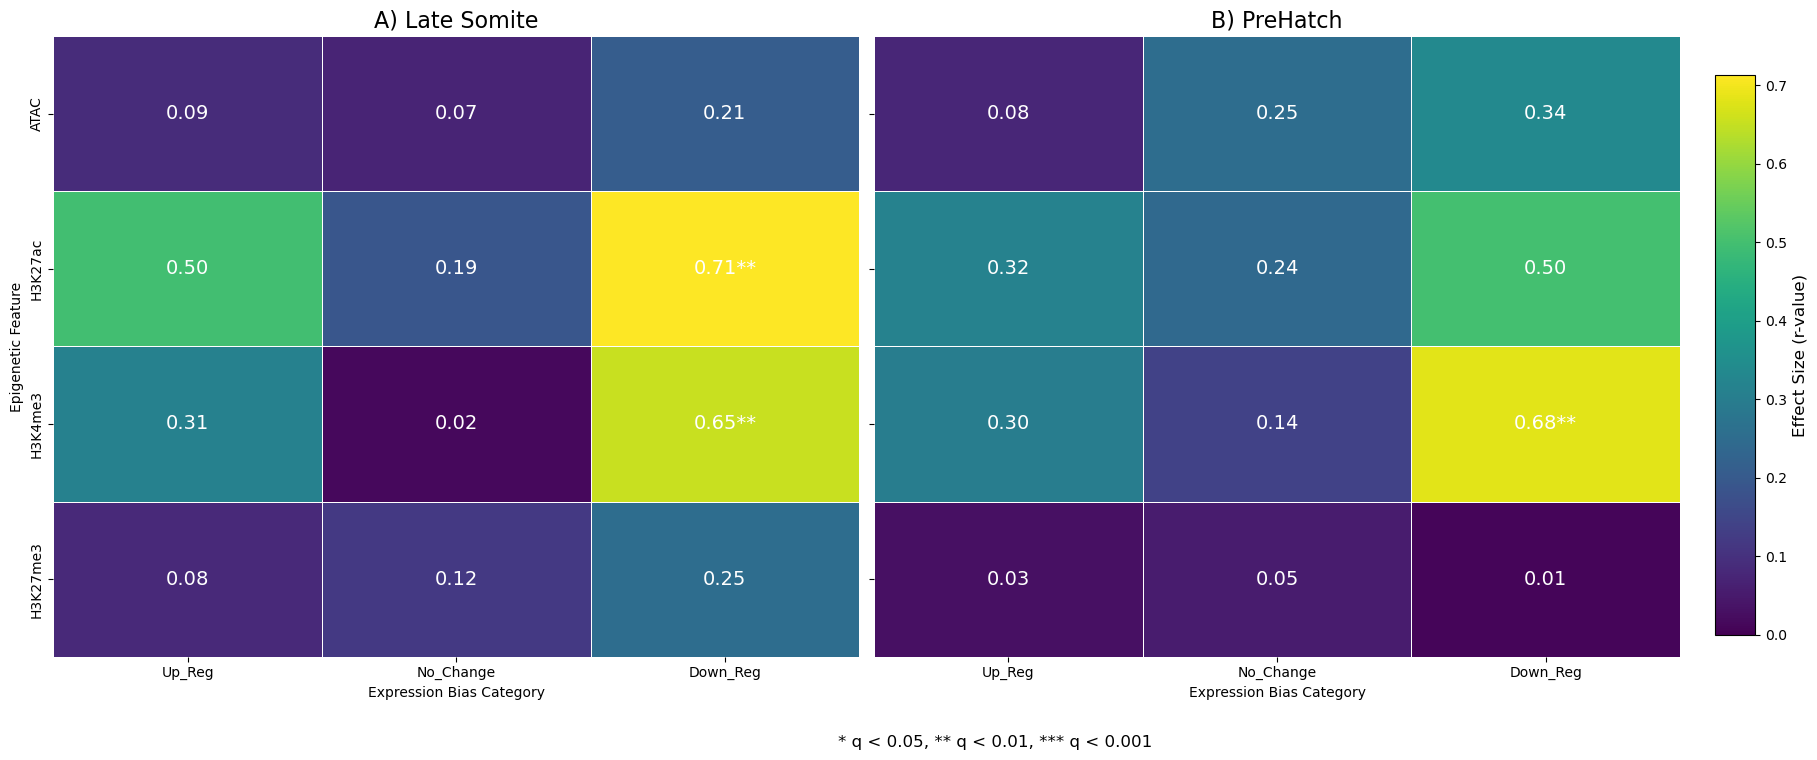

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Combined_wilcoxon_summary.csv")

df.rename(columns={
    "Bias": "Expression Bias Group",
    "r": "r-value (Effect Size)",
    "q_global": "q-value"
}, inplace=True)
bias_map = {
    "SubgA-dominant": "Up_Reg",
    "Balanced": "No_Change",
    "SubgB-dominant": "Down_Reg"
}
df["Expression Bias Group"] = df["Expression Bias Group"].map(bias_map)
df = df.dropna(subset=["r-value (Effect Size)"])
def prepare_heatmap_data(df_stage):
    r_pivot = df_stage.pivot(index="Feature", columns="Expression Bias Group", values="r-value (Effect Size)")
    q_pivot = df_stage.pivot(index="Feature", columns="Expression Bias Group", values="q-value")
    
    q_stars = q_pivot.applymap(lambda q: '***' if q < 0.001 else ('**' if q < 0.01 else ('*' if q < 0.05 else '')))
    r_values_text = r_pivot.applymap(lambda r: f"{r:.2f}")
    annot_labels = r_values_text + q_stars
    
    col_order = ["Up_Reg", "No_Change", "Down_Reg"]
    row_order = ["ATAC", "H3K27ac", "H3K4me3", "H3K27me3"]
    
    r_pivot = r_pivot.reindex(index=row_order, columns=col_order)
    annot_labels = annot_labels.reindex(index=row_order, columns=col_order)
    
    return r_pivot, annot_labels

r_lsom, annot_lsom = prepare_heatmap_data(df[df["Stage"] == "LSom"])
r_preh, annot_preh = prepare_heatmap_data(df[df["Stage"] == "PreHatch"])
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

vmin, vmax = 0, df["r-value (Effect Size)"].max()

sns.heatmap(r_lsom, ax=axes[0], cmap="viridis", annot=False, linewidths=0.5, linecolor="white", vmin=vmin, vmax=vmax, cbar=False)
axes[0].set_title("A) Late Somite", fontsize=16)
axes[0].set_xlabel("Expression Bias Category")
axes[0].set_ylabel("Epigenetic Feature")
for i in range(annot_lsom.shape[0]):
    for j in range(annot_lsom.shape[1]):
        axes[0].text(j+0.5, i+0.5, annot_lsom.iloc[i,j], ha="center", va="center", color="white", fontsize=14)

sns.heatmap(r_preh, ax=axes[1], cmap="viridis", annot=False, linewidths=0.5, linecolor="white", vmin=vmin, vmax=vmax, cbar=False)
axes[1].set_title("B) PreHatch", fontsize=16)
axes[1].set_xlabel("Expression Bias Category")
axes[1].set_ylabel("")
for i in range(annot_preh.shape[0]):
    for j in range(annot_preh.shape[1]):
        axes[1].text(j+0.5, i+0.5, annot_preh.iloc[i,j], ha="center", va="center", color="white", fontsize=14)

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.86, 0.15, 0.02, 0.7])
mappable = axes[0].collections[0]
cbar = fig.colorbar(mappable, cax=cbar_ax)
cbar.set_label("Effect Size (r-value)", size=12)

fig.text(0.5, 0.01, "* q < 0.05, ** q < 0.01, *** q < 0.001", ha="center", fontsize=12)

plt.tight_layout(rect=[0, 0.05, 0.85, 0.95])
plt.savefig("FDR_Corrected_Regulatory_Heatmap.png", dpi=300)
plt.show()


In [17]:
import pandas as pd
df = pd.read_csv("Combined_wilcoxon_summary.csv")

df_lsom = df[df["Stage"] == "LSom"].copy()

df_lsom["Z"] = df_lsom["Z"].round(3)
df_lsom["p_value"] = df_lsom["p_value"].round(4)
df_lsom["r"] = df_lsom["r"].round(3)
df_lsom.rename(columns={
    "Feature": "Feature",
    "Z": "Z-statistic",
    "p_value": "p-value",
    "N_pairs": "Sample Size (N)",
    "r": "Effect Size (r)"
}, inplace=True)

bias_order = ["SubgA-dominant", "Balanced", "SubgB-dominant"]
df_lsom["Bias"] = pd.Categorical(df_lsom["Bias"], categories=bias_order, ordered=True)
df_lsom = df_lsom.sort_values(["Bias", "Feature"])

summary_tables = {}
for bias, subdf in df_lsom.groupby("Bias"):
    title = f"Late Somite {bias} Expression Bias Category"
    summary_tables[title] = subdf[["Feature", "Z-statistic", "p-value", "Sample Size (N)", "Effect Size (r)"]]
for title, table in summary_tables.items():
    print(title)
    display(table)
    print("\n")


Late Somite SubgA-dominant Expression Bias Category


/var/folders/bp/612g8dnd7hv531z_7pdvjlkr0000gn/T/ipykernel_3051/950025961.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for bias, subdf in df_lsom.groupby("Bias"):


,Feature,Z-statistic,p-value,Sample Size (N),Effect Size (r)
4,ATAC,-0.444000,0.672100,25,0.089000
5,H3K27ac,-2.489000,0.011500,25,0.498000
6,H3K27me3,-0.417000,0.691500,25,0.083000
7,H3K4me3,-1.547000,0.126600,25,0.309000




Late Somite Balanced Expression Bias Category


,Feature,Z-statistic,p-value,Sample Size (N),Effect Size (r)
0,ATAC,-0.343000,0.731700,24,0.070000
1,H3K27ac,-0.929000,0.353000,24,0.190000
2,H3K27me3,-0.586000,0.558000,24,0.120000
3,H3K4me3,-0.081000,0.936800,25,0.016000




Late Somite SubgB-dominant Expression Bias Category


,Feature,Z-statistic,p-value,Sample Size (N),Effect Size (r)
8,ATAC,-1.036000,0.312300,25,0.207000
9,H3K27ac,-3.565000,0.000100,25,0.713000
10,H3K27me3,-1.265000,0.220000,25,0.253000
11,H3K4me3,-3.269000,0.000600,25,0.654000


In [19]:
import pandas as pd

df = pd.read_csv("Combined_wilcoxon_summary.csv")

df_lsom = df[df["Stage"] == "LSom"].copy()

df_lsom["Z"] = df_lsom["Z"].round(3)
df_lsom["p_value"] = df_lsom["p_value"].round(4)
df_lsom["r"] = df_lsom["r"].round(3)
df_lsom["q_global"] = df_lsom["q_global"].round(4)

df_lsom.rename(columns={
    "Feature": "Feature",
    "Z": "Z-statistic",
    "p_value": "p-value",
    "N_pairs": "Sample Size (N)",
    "r": "Effect Size (r)",
    "q_global": "q-value (global FDR)"
}, inplace=True)

bias_order = ["SubgA-dominant", "Balanced", "SubgB-dominant"]
df_lsom["Bias"] = pd.Categorical(df_lsom["Bias"], categories=bias_order, ordered=True)
df_lsom = df_lsom.sort_values(["Bias", "Feature"])

summary_tables = {}
for bias, subdf in df_lsom.groupby("Bias"):
    title = f"Late Somite {bias} Expression Bias Category"
    summary_tables[title] = subdf[["Feature", "Z-statistic", "p-value", "Sample Size (N)", "Effect Size (r)", "q-value (global FDR)"]]

for title, table in summary_tables.items():
    print(title)
    display(table)
    print("\n")


Late Somite SubgA-dominant Expression Bias Category


/var/folders/bp/612g8dnd7hv531z_7pdvjlkr0000gn/T/ipykernel_3051/2164755559.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for bias, subdf in df_lsom.groupby("Bias"):


,Feature,Z-statistic,p-value,Sample Size (N),Effect Size (r),q-value (global FDR)
4,ATAC,-0.444000,0.672100,25,0.089000,0.878000
5,H3K27ac,-2.489000,0.011500,25,0.498000,0.055000
6,H3K27me3,-0.417000,0.691500,25,0.083000,0.878000
7,H3K4me3,-1.547000,0.126600,25,0.309000,0.375800




Late Somite Balanced Expression Bias Category


,Feature,Z-statistic,p-value,Sample Size (N),Effect Size (r),q-value (global FDR)
0,ATAC,-0.343000,0.731700,24,0.070000,0.878000
1,H3K27ac,-0.929000,0.353000,24,0.190000,0.605200
2,H3K27me3,-0.586000,0.558000,24,0.120000,0.837000
3,H3K4me3,-0.081000,0.936800,25,0.016000,0.977500




Late Somite SubgB-dominant Expression Bias Category


,Feature,Z-statistic,p-value,Sample Size (N),Effect Size (r),q-value (global FDR)
8,ATAC,-1.036000,0.312300,25,0.207000,0.576600
9,H3K27ac,-3.565000,0.000100,25,0.713000,0.002900
10,H3K27me3,-1.265000,0.220000,25,0.253000,0.471400
11,H3K4me3,-3.269000,0.000600,25,0.654000,0.004500


In [25]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests

CSV_PATH = 'Final Task 2 LSom - Sheet1.csv'
DO_BH = True  

try:
    df = pd.read_csv(CSV_PATH)
    print("Successfully loaded Late Somite file.")
except FileNotFoundError:
    print(f"Error: Could not find file: {CSV_PATH}")
    df = pd.DataFrame()

if not df.empty:
    print("Cleaning column names...")
    df.columns = df.columns.str.replace(' ', '_').str.replace(r'[\(\),]', '', regex=True)
    print("Column names ready.")

required = {'baseMean', 'log2FoldChange_S11_Lsom', 'Exp_Bias'}
if not df.empty and required.issubset(set(df.columns)):
    df.loc[:, 'expression_sgB'] = (2 * df['baseMean']) / (np.power(2, df['log2FoldChange_S11_Lsom']) + 1)
    df.loc[:, 'expression_sgA'] = (2 * df['baseMean']) - df['expression_sgB']
    print("Computed expression_sgA and expression_sgB.")
else:
    if not df.empty:
        missing = required - set(df.columns)
        print(f"Missing required columns: {sorted(missing)}")

if not df.empty and {'expression_sgA','expression_sgB','Exp_Bias'}.issubset(set(df.columns)):

    up_reg_df = df[df['Exp_Bias'] == 'Up_Reg'].copy()
    down_reg_df = df[df['Exp_Bias'] == 'Down_Reg'].copy()

    feature_cols = {
        'ATAC':     ('ATAC_PEAK_MEAN_sgA',    'ATAC_PEAK_MEAN_sgB'),
        'H3K27ac':  ('H3K27ac_PEAK_MEAN_sgA', 'H3K27ac_PEAK_MEAN_sgB'),
        'H3K4me3':  ('H3K4me3_PEAK_MEAN_sgA', 'H3K4me3_PEAK_MEAN_sgB'),
        'H3K27me3': ('H3K27me3_PEAK_MEAN_sgA','H3K27me3_PEAK_MEAN_sgB'),
    }

    results = []

    for feat, (colA, colB) in feature_cols.items():
        if not {colA, colB}.issubset(set(df.columns)):
            print(f"Warning: missing columns for {feat}: {colA}, {colB}")
            continue
        dom_A = up_reg_df[['expression_sgA', colA]].rename(columns={'expression_sgA':'expression', colA:'mark'})
        dom_B = down_reg_df[['expression_sgB', colB]].rename(columns={'expression_sgB':'expression', colB:'mark'})
        dominant_df = pd.concat([dom_A, dom_B], ignore_index=True)
        dominant_df = dominant_df.dropna(subset=['expression','mark'])

        if len(dominant_df) >= 3:
            rho_dom, p_dom = spearmanr(dominant_df['mark'], dominant_df['expression'])
        else:
            rho_dom, p_dom = np.nan, np.nan

        results.append({
            'Group': 'Dominant',
            'Feature': feat,
            'n': len(dominant_df),
            'Spearman_rho': rho_dom,
            'p_value': p_dom
        })
        supp_A = down_reg_df[['expression_sgA', colA]].rename(columns={'expression_sgA':'expression', colA:'mark'})
        supp_B = up_reg_df[['expression_sgB', colB]].rename(columns={'expression_sgB':'expression', colB:'mark'})
        suppressed_df = pd.concat([supp_A, supp_B], ignore_index=True)
        suppressed_df = suppressed_df.dropna(subset=['expression','mark'])

        if len(suppressed_df) >= 3:
            rho_supp, p_supp = spearmanr(suppressed_df['mark'], suppressed_df['expression'])
        else:
            rho_supp, p_supp = np.nan, np.nan

        results.append({
            'Group': 'Suppressed',
            'Feature': feat,
            'n': len(suppressed_df),
            'Spearman_rho': rho_supp,
            'p_value': p_supp
        })
    out = pd.DataFrame(results)
    if DO_BH and out['p_value'].notna().any():
        mask = out['p_value'].notna()
        _, qvals, _, _ = multipletests(out.loc[mask, 'p_value'], alpha=0.05, method='fdr_bh')
        out.loc[mask, 'q_value_BH'] = qvals

    out = out.sort_values(['Group','Feature']).reset_index(drop=True)
    out['Spearman_rho'] = out['Spearman_rho'].round(4)
    out['p_value'] = out['p_value'].round(6)
    if 'q_value_BH' in out:
        out['q_value_BH'] = out['q_value_BH'].round(6)

    print("\n--- Spearman Correlation: Mark vs Expression (Late Somite) ---")
    for grp in ['Dominant','Suppressed']:
        sub = out[out['Group']==grp]
        if sub.empty: 
            continue
        print(f"\n{grp} ohnologs:")
        for _, r in sub.iterrows():
            star = ""
            if 'q_value_BH' in r and pd.notna(r['q_value_BH']):
                if r['q_value_BH'] < 0.001: star = " ***"
                elif r['q_value_BH'] < 0.01: star = " **"
                elif r['q_value_BH'] < 0.05: star = " *"
            print(f"  {r['Feature']:<8}  n={int(r['n']):>3}  rho={r['Spearman_rho']:+.4f}  p={r['p_value']:.6f}"
                  + (f"  q(BH)={r['q_value_BH']:.6f}{star}" if 'q_value_BH' in out else ""))

    out.to_csv("LSom_spearman_dominant_suppressed.csv", index=False)
    print("\nSaved: LSom_spearman_dominant_suppressed.csv")

else:
    print("\nAnalysis could not be completed due to missing data or required columns.")


Successfully loaded Late Somite file.
Cleaning column names...
Column names ready.
Computed expression_sgA and expression_sgB.

--- Spearman Correlation: Mark vs Expression (Late Somite) ---

Dominant ohnologs:
  ATAC      n= 50  rho=+0.5257  p=0.000088  q(BH)=0.000354 ***
  H3K27ac   n= 50  rho=+0.4190  p=0.002457  q(BH)=0.006282 **
  H3K27me3  n= 50  rho=-0.0274  p=0.849944  q(BH)=0.849944
  H3K4me3   n= 50  rho=+0.5480  p=0.000038  q(BH)=0.000305 ***

Suppressed ohnologs:
  ATAC      n= 50  rho=+0.4096  p=0.003141  q(BH)=0.006282 **
  H3K27ac   n= 50  rho=+0.2849  p=0.044915  q(BH)=0.059887
  H3K27me3  n= 50  rho=-0.0919  p=0.525403  q(BH)=0.600460
  H3K4me3   n= 50  rho=+0.3647  p=0.009211  q(BH)=0.014737 *

Saved: LSom_spearman_dominant_suppressed.csv


/var/folders/bp/612g8dnd7hv531z_7pdvjlkr0000gn/T/ipykernel_1257/849499652.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  q_stars = q_pivot.applymap(lambda q: '***' if q < 0.001 else ('**' if q < 0.01 else ('*' if q < 0.05 else '')))
/var/folders/bp/612g8dnd7hv531z_7pdvjlkr0000gn/T/ipykernel_1257/849499652.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  r_values_text = r_pivot.applymap(lambda r: f"{r:.2f}")
/var/folders/bp/612g8dnd7hv531z_7pdvjlkr0000gn/T/ipykernel_1257/849499652.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  q_stars = q_pivot.applymap(lambda q: '***' if q < 0.001 else ('**' if q < 0.01 else ('*' if q < 0.05 else '')))
/var/folders/bp/612g8dnd7hv531z_7pdvjlkr0000gn/T/ipykernel_1257/849499652.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  r_values_text = r_pivot.applymap(lambda r: f"{r:.2f}")
/var/f

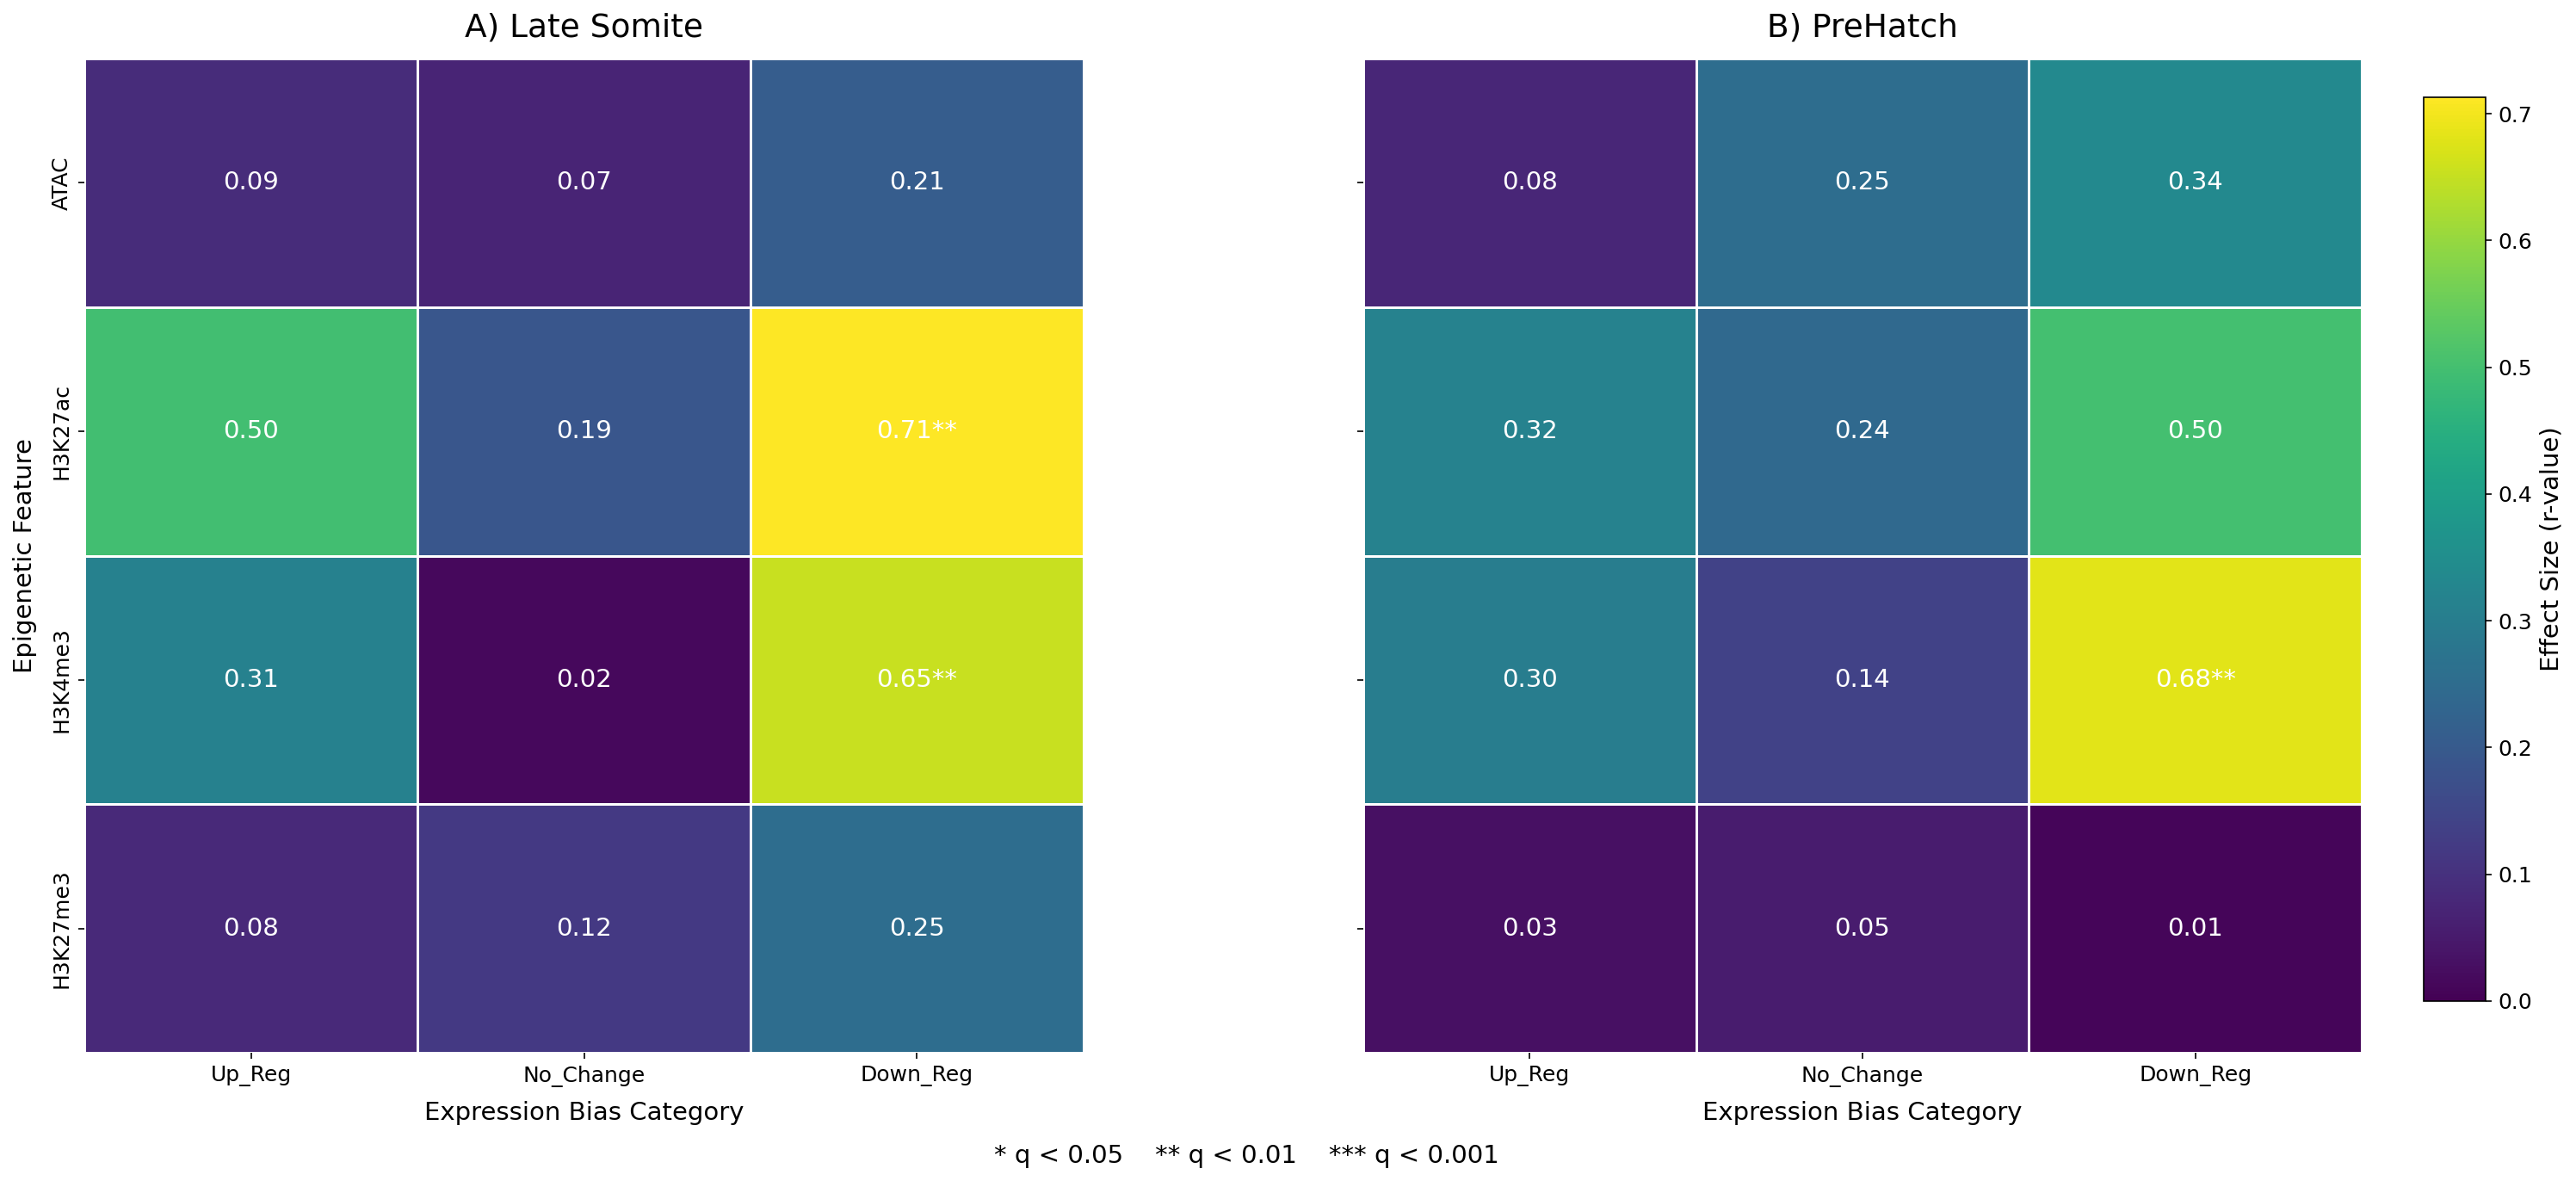

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Combined_wilcoxon_summary.csv")

df.rename(columns={
    "Bias": "Expression Bias Group",
    "r": "r-value (Effect Size)",
    "q_global": "q-value"
}, inplace=True)
bias_map = {
    "SubgA-dominant": "Up_Reg",
    "Balanced": "No_Change",
    "SubgB-dominant": "Down_Reg"
}
df["Expression Bias Group"] = df["Expression Bias Group"].map(bias_map)

df = df.dropna(subset=["r-value (Effect Size)"])

def prepare_heatmap_data(df_stage):
    r_pivot = df_stage.pivot(index="Feature", columns="Expression Bias Group", values="r-value (Effect Size)")
    q_pivot = df_stage.pivot(index="Feature", columns="Expression Bias Group", values="q-value")
    
    q_stars = q_pivot.applymap(lambda q: '***' if q < 0.001 else ('**' if q < 0.01 else ('*' if q < 0.05 else '')))
    r_values_text = r_pivot.applymap(lambda r: f"{r:.2f}")
    annot_labels = r_values_text + q_stars
    
    col_order = ["Up_Reg", "No_Change", "Down_Reg"]
    row_order = ["ATAC", "H3K27ac", "H3K4me3", "H3K27me3"]
    
    r_pivot = r_pivot.reindex(index=row_order, columns=col_order)
    annot_labels = annot_labels.reindex(index=row_order, columns=col_order)
    
    return r_pivot, annot_labels

r_lsom, annot_lsom = prepare_heatmap_data(df[df["Stage"] == "LSom"])
r_preh, annot_preh = prepare_heatmap_data(df[df["Stage"] == "PreHatch"])

plt.rcParams['figure.dpi'] = 150 

fig, axes = plt.subplots(
    1, 2, figsize=(24, 10), sharey=True,
    gridspec_kw={'wspace': 0.28}
)

vmin, vmax = 0, df["r-value (Effect Size)"].max()

heatmap_kwargs = dict(
    cmap="viridis", annot=False, linewidths=0.6, linecolor="white",
    vmin=vmin, vmax=vmax, cbar=False
)

sns.heatmap(r_lsom, ax=axes[0], **heatmap_kwargs)
axes[0].set_title("A) Late Somite", fontsize=18, pad=12)
axes[0].set_xlabel("Expression Bias Category", fontsize=14, labelpad=8)
axes[0].set_ylabel("Epigenetic Feature", fontsize=14, labelpad=8)
axes[0].tick_params(axis='x', labelrotation=0, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

for i in range(annot_lsom.shape[0]):
    for j in range(annot_lsom.shape[1]):
        axes[0].text(j + 0.5, i + 0.5, annot_lsom.iloc[i, j],
                     ha="center", va="center", color="white", fontsize=14)

sns.heatmap(r_preh, ax=axes[1], **heatmap_kwargs)
axes[1].set_title("B) Pre-Hatch", fontsize=18, pad=12)
axes[1].set_xlabel("Expression Bias Category", fontsize=14, labelpad=8)
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', labelrotation=0, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

for i in range(annot_preh.shape[0]):
    for j in range(annot_preh.shape[1]):
        axes[1].text(j + 0.5, i + 0.5, annot_preh.iloc[i, j],
                     ha="center", va="center", color="white", fontsize=14)

fig.subplots_adjust(right=0.86) 
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
mappable = axes[0].collections[0]
cbar = fig.colorbar(mappable, cax=cbar_ax)
cbar.set_label("Effect Size (r-value)", size=14)
cbar.ax.tick_params(labelsize=12)

fig.text(0.5, 0.03, "* q < 0.05    ** q < 0.01    *** q < 0.001",
         ha="center", va="center", fontsize=14)

plt.tight_layout(rect=[0.02, 0.06, 0.86, 0.96])
plt.savefig("FDR_Corrected_Regulatory_Heatmap.png", dpi=600, bbox_inches="tight")
plt.show()
